In [1]:
# Library cell
import pandas as pd
import regex as re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import panel as pn
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [2]:
# Function cell
## Find non-numeric values
def find_non_numeric_values(df):
    non_numeric_columns = df.select_dtypes(include=['object']).columns
    non_numeric_values = {}
    for col in non_numeric_columns:
        # Change the column to numeric type, if it isn't numeric, it will be converted to NaN
        temp_col = pd.to_numeric(df[col], errors='coerce')      
        # Fill the NaN values with the original values
        non_numeric_data = df[temp_col.isna() & df[col].notna()]   
        if not non_numeric_data.empty:
            non_numeric_values[col] = non_numeric_data[col].tolist()  
    return non_numeric_values

## Remove non-numeric values
def remove_commas_and_convert(df):
    non_numeric_columns = df.select_dtypes(include=['object']).columns
    for col in non_numeric_columns:
        # Check if the column contains any non-numeric values
        try:
           # Remove commas from the column
            temp_col = df[col] = df[col].str.replace(',', '')
            temp_col_numeric = pd.to_numeric(temp_col, errors='raise')  
            # If the column can be converted to numeric, replace the original column with the new column
            df[col] = temp_col_numeric
        except ValueError:
            # If the column contains non-numeric values, keep it
            continue
    return df

## **Load data**

In [3]:
file_path = r'D:\Repo-train\Jnotebook\FDI_Analytics\dataset\fdi_industry_en.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Order,Industry,Number of new projects,Newly registered capital (million USD),Adjusted project number,Adjusted capital (million USD),Number of times of capital contribution to buy shares,"Value of capital contribution, share purchase\n(million USD)",Year
0,1,Manufacturing and processing industry,1020,9812.57,861,5132.55,290,593.51,2016
1,2,"Wholesale and retail; repair cars, motorbikes,...",505,367.04,99,320.72,1269,1211.45,2016
2,3,Real estate business,59,1522.67,12,-559.05,80,722.55,2016
3,4,"Professional activities, science and technology",282,436.45,65,316.95,212,179.68,2016
4,5,Warehousing transportation,88,703.94,22,-29,119,207.19,2016


In [5]:
df.tail()

,Order,Industry,Number of new projects,Newly registered capital (million USD),Adjusted project number,Adjusted capital (million USD),Number of times of capital contribution to buy shares,"Value of capital contribution, share purchase\n(million USD)",Year
126,127,Extractive,1,2,-,-,3,17.09,2022
127,128,Accommodation and food services,33,8,18,-59.82,240,63.71,2022
128,129,Other service activities,2,0,4,3.37,17,2.24,2022
129,130,"Art, play and entertainment",1,0,1,0.15,11,3.5,2022
130,131,Employment activities in households,-,-,-,-,1,0.55,2022


## **Analyze the data**

In [6]:
# Drop column Order
n_df = df.drop(columns=['Order'])
# Show shape data
print(n_df.shape, end='\n ---------------- \n')
# Show info data
print(n_df.info(), end='\n ---------------- \n')
# Check for Duplicate
print(n_df.nunique(), end='\n ---------------- \n')
# Check data exist nan or not (bool)
print(n_df.isnull().any(), end='\n ---------------- \n')
# Check for missing value
print(n_df.isna().sum(), end='\n ---------------- \n')

(131, 8)
 ---------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Industry                                                     131 non-null    object
 1   Number of new projects                                       131 non-null    object
 2   Newly registered capital (million USD)                       131 non-null    object
 3   Adjusted project number                                      127 non-null    object
 4   Adjusted capital (million USD)                               127 non-null    object
 5   Number of times of capital contribution to buy shares        124 non-null    object
 6   Value of capital contribution, share purchase
(million USD)  124 non-null    object
 7   Year                                                         1

#### **Observations**
- The shape of dataset `fdi_industry_en.csv` is 131 rows and 8 columns
- Only `Year` column dftype int, so we will convert some columns to numeric for consistency to calculate and explore the data.
- Check duplicates to get total number of `Industr`, `Year`  
- Check all columns to get boolean values indicating if missing values exist and determine which columns have missing values

`Adjusted project number`=>`Adjusted capital (million USD)`

`Number of times of capital contribution to buy shares`=>`Value of capital contribution, share purchase\n(million USD)`)  

## **Data Cleaning** 

### Step-by-step
1. Get all "*not numeric*" from all columns with func `find_non_numeric_values()`
2. Format numeric with func `remove_commas_and_convert()`
3. Remove special character
4. Fill all NaN to 0 
5. Drop `Industry` and `Year` column for consistency data to numeric
6. Re-execute  `find_non_numeric_values()` to check result
7. Random select rows to print for review  


In [7]:
## Check for not numeric value
non_numeric_dict = find_non_numeric_values(n_df)
if non_numeric_dict:
    for col, values in non_numeric_dict.items():
        print(f"Column '{col}' have values not numeric:")
        print(values)
else:
    print("No non-numeric values found.")

Column 'Industry' have values not numeric:
['Manufacturing and processing industry', 'Wholesale and retail; repair cars, motorbikes, motorbikes', 'Real estate business', 'Professional activities, science and technology', 'Warehousing transportation', 'Construction', 'Financial, banking and insurance activities', 'Water supply and waste treatment', 'Accommodation and food services', 'Information and communication', 'Art, play and entertainment', 'Administrative activities and support services', 'Producing and distributing electricity, gas, water, air conditioning', 'Agriculture, forestry and fisheries', 'Extractive', 'Other service activities', 'Education and training', 'Health and social assistance activities', 'Employment activities in households', 'Manufacturing and processing industry', 'Producing and distributing electricity, gas, water, air conditioning', 'Real estate business', 'Wholesale and retail; repair cars, motorbikes, motorbikes', 'Extractive', 'Construction', 'Professiona

In [8]:
## Drop comma value
n_df = remove_commas_and_convert(n_df)

In [9]:
# Drop ' - ' value
### Drop ' - ' value column 'Number of new projects'
n_df['Number of new projects'] = n_df['Number of new projects'].replace(to_replace=r'[^0-9.]', value=0, regex=True)
### Drop ' - ' value column 'Newly registered capital (million USD)'
n_df['Newly registered capital (million USD)'] = n_df['Newly registered capital (million USD)'].replace(to_replace=r'[^0-9.]', value=0, regex=True)
### Drop ' - ' value column 'Adjusted project number'
n_df['Adjusted project number'] = n_df['Adjusted project number'].replace(to_replace=r'[^0-9.]', value=0, regex=True)
### Drop ' - ' value column 'Adjusted capital (million USD)'
n_df['Adjusted capital (million USD)'] = n_df['Adjusted capital (million USD)'].replace(to_replace=r'[^0-9.]', value=0, regex=True)
### Drop ' - ' value column 'Number of times of capital contribution to buy shares'
n_df['Number of times of capital contribution to buy shares'] = n_df['Number of times of capital contribution to buy shares'].replace(to_replace=r'[^0-9.]', value=0, regex=True)
### Drop ' - ' value column 'Value of capital contribution, share purchase\n(million USD)'
n_df['Value of capital contribution, share purchase\n(million USD)'] = n_df['Value of capital contribution, share purchase\n(million USD)'].replace(to_replace=r'[^0-9.]', value=0, regex=True)

In [10]:
## Check for not numeric value
non_numeric_dict = find_non_numeric_values(n_df)
if non_numeric_dict:
    for col, values in non_numeric_dict.items():
        print(f"Column '{col}' have values not numeric:")
        print(values)
else:
    print("No non-numeric values found.")

Column 'Industry' have values not numeric:
['Manufacturing and processing industry', 'Wholesale and retail; repair cars motorbikes motorbikes', 'Real estate business', 'Professional activities science and technology', 'Warehousing transportation', 'Construction', 'Financial banking and insurance activities', 'Water supply and waste treatment', 'Accommodation and food services', 'Information and communication', 'Art play and entertainment', 'Administrative activities and support services', 'Producing and distributing electricity gas water air conditioning', 'Agriculture forestry and fisheries', 'Extractive', 'Other service activities', 'Education and training', 'Health and social assistance activities', 'Employment activities in households', 'Manufacturing and processing industry', 'Producing and distributing electricity gas water air conditioning', 'Real estate business', 'Wholesale and retail; repair cars motorbikes motorbikes', 'Extractive', 'Construction', 'Professional activities s

In [11]:
## Drop missing value fill with 0
### Adjusted project number   
n_df['Adjusted project number'] = n_df['Adjusted project number'].fillna(0)
### Adjusted capital (million USD)
n_df['Adjusted capital (million USD)'] = n_df['Adjusted capital (million USD)'].fillna(0)
### Number of times of capital contribution to buy shares       
n_df['Number of times of capital contribution to buy shares'] = n_df['Number of times of capital contribution to buy shares'].fillna(0)
### Value of capital contribution, share purchase\n(million USD)
n_df['Value of capital contribution, share purchase\n(million USD)'] = n_df['Value of capital contribution, share purchase\n(million USD)'].fillna(0)

In [12]:
n_df.sample(n=10)

,Industry,Number of new projects,Newly registered capital (million USD),Adjusted project number,Adjusted capital (million USD),Number of times of capital contribution to buy shares,"Value of capital contribution, share purchase\n(million USD)",Year
71,Art play and entertainment,6,8.27,1,2.65,26,51.81,2019
117,Information and communication,241,183,52,310.73,305,161.64,2022
15,Other service activities,5,55.76,7,9.77,6,2.23,2016
45,Accommodation and food services,102,27.36,21,59.82,311,491.34,2018
8,Accommodation and food services,97,278.14,11,58.02,135,70.53,2016
26,Water supply and waste treatment,12,566.7,2,1.3,0,0,2017
70,Education and training,71,24.96,12,9.36,172,30.3,2019
61,Producing and distributing electricity gas wat...,15,722.6,2,0,62,302.42,2019
41,Professional activities science and technology,386,183.37,88,144.05,584,1820.00,2018
126,Extractive,1,2,0,0,3,17.09,2022


In [13]:
## Data consistency
cols_to_convert = n_df.columns.drop(['Industry', 'Year'])
n_df[cols_to_convert] = n_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
## Check for missing value
print(n_df.isnull().values.any())
print(n_df.isna().sum())

False
Industry                                                        0
Number of new projects                                          0
Newly registered capital (million USD)                          0
Adjusted project number                                         0
Adjusted capital (million USD)                                  0
Number of times of capital contribution to buy shares           0
Value of capital contribution, share purchase\n(million USD)    0
Year                                                            0
dtype: int64


In [14]:
# Summary statistics
n_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of new projects,131.0,140.251908,254.032413,0.0,6.000,33.00,110.000,1314.00
Newly registered capital (million USD),131.0,866.555344,2170.593023,0.0,13.405,94.00,377.775,12093.14
Adjusted project number,131.0,62.557252,166.067834,0.0,3.000,13.00,31.500,861.00
Adjusted capital (million USD),131.0,417.013893,1403.382507,0.0,2.620,30.88,116.490,7977.90
Number of times of capital contribution to buy shares,131.0,285.427481,557.047188,0.0,12.500,68.00,250.500,3292.00
"Value of capital contribution, share purchase\n(million USD)",131.0,413.856107,871.367984,0.0,11.615,74.03,397.190,7086.66
Year,131.0,2018.992366,2.013402,2016.0,2017.000,2019.00,2021.000,2022.00


## **Univariate Analysis**

##### Total investment over the years

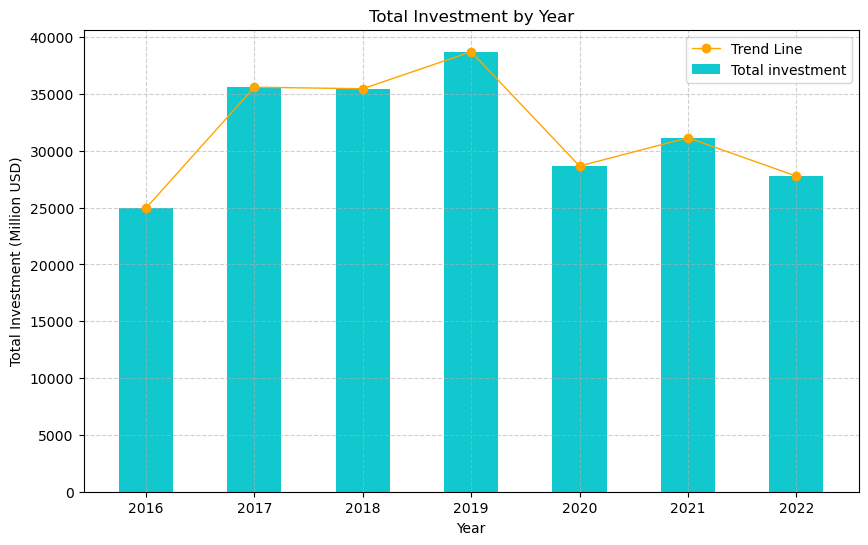

In [15]:
# Caculate the total investment in each row (add column 'Total investment')
n_df['Total investment'] = n_df['Newly registered capital (million USD)'] + n_df['Adjusted capital (million USD)'] + n_df['Value of capital contribution, share purchase\n(million USD)']
# Caculate the total investment in each year (group by year)
total_investment_by_year = n_df.groupby('Year')['Total investment'].sum().reset_index() 
# plot the total investment by year
plt.figure(figsize=(10, 6))
plt.bar(total_investment_by_year['Year'], total_investment_by_year['Total investment'], color='#10c8ce',width= 0.5 ,  label='Total investment')
plt.plot(total_investment_by_year['Year'], total_investment_by_year['Total investment'], color='orange', marker='o', linewidth=1, label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Total Investment (Million USD)')
plt.title('Total Investment by Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [16]:
# Statistical analysis
total_investment_by_year['Change'] = total_investment_by_year['Total investment'].diff()
total_investment_by_year['Percentage Change'] = total_investment_by_year['Change']/total_investment_by_year['Total investment'].shift(1)*100
total_investment_by_year['Percentage Change'] = total_investment_by_year['Percentage Change'].round(2).astype(str) + '%'
total_investment_by_year

,Year,Total investment,Change,Percentage Change
0,2016,24960.96,NaN,nan%
1,2017,35605.15,10644.19,42.64%
2,2018,35469.20,-135.95,-0.38%
3,2019,38727.77,3258.57,9.19%
4,2020,28667.57,-10060.20,-25.98%
5,2021,31153.35,2485.78,8.67%
6,2022,27778.72,-3374.63,-10.83%


**From the bar/line chart and `total_investment_by_year` df, we can infer the following**
- **Significant Growth in 2017**: The year 2017 saw a remarkable increase in total investment, with an increase of *$10,644.19 million*, representing a *42.64%* rise compared to 2016. This could be due to a surge in new projects or adjustments in investment policies that attracted more foreign capital.
- **Decline in 2020**: The year 2020 was challenging, with total investment decreasing by *25.98%* compared to 2019. This significant drop could be attributed to the impact of the *COVID-19* pandemic, leading to a global economic slowdown.
- **Recovery and Mild Volatility**: After the decline in 2020, investment saw a slight recovery in 2021, but again decreased in 2022. This may be the result of a "*recession/economic downturn*" on the world.

#### Proportion in total investment

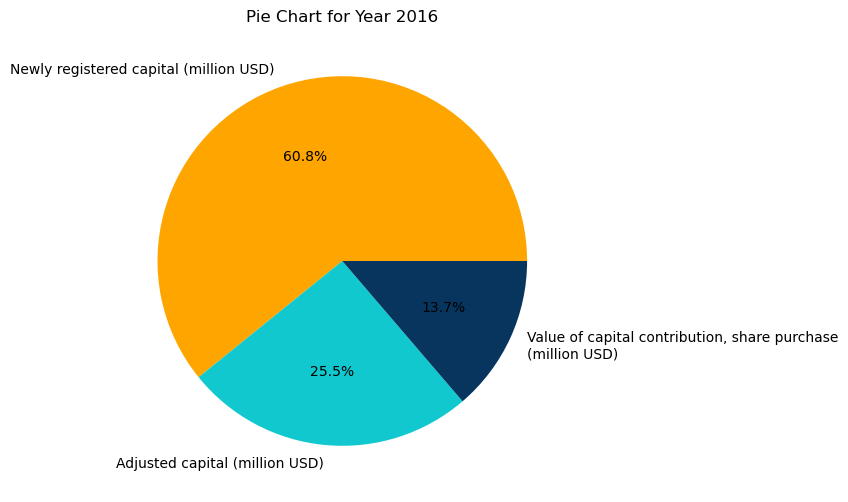

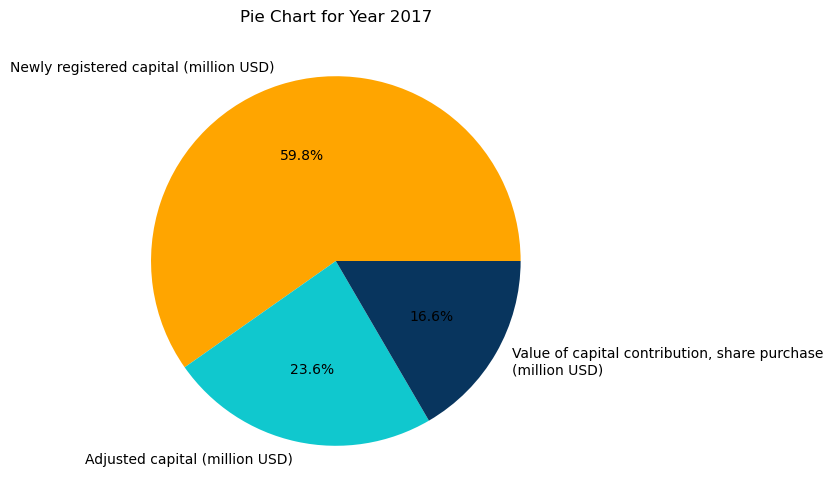

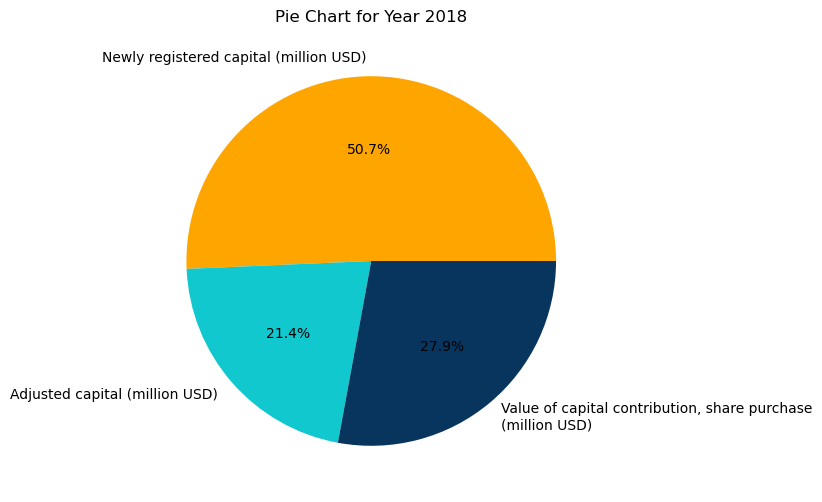

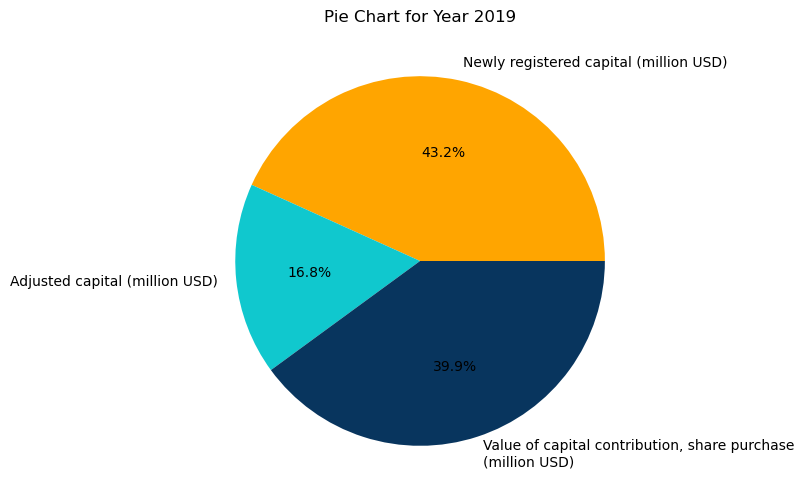

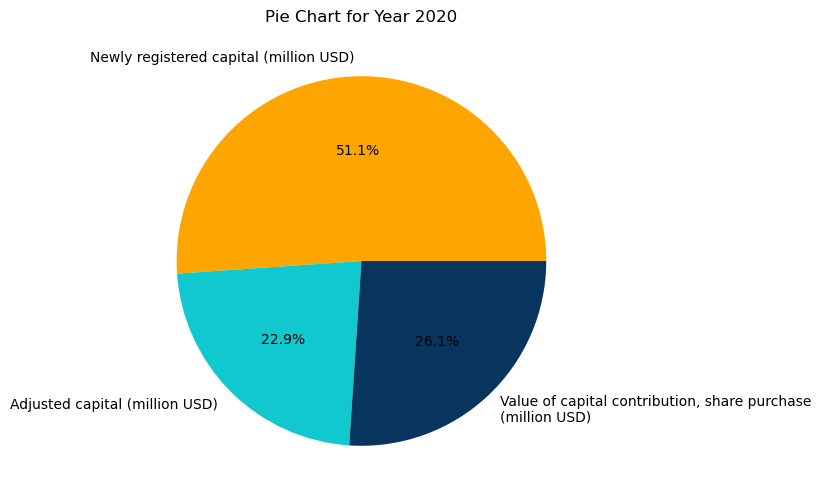

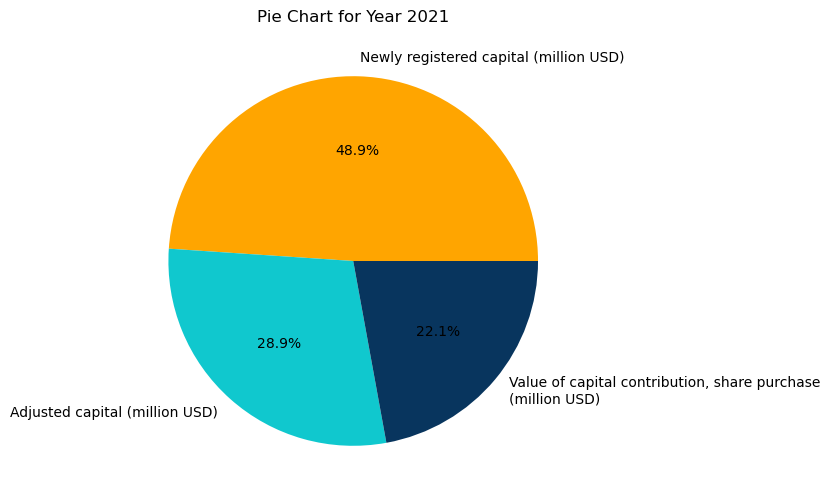

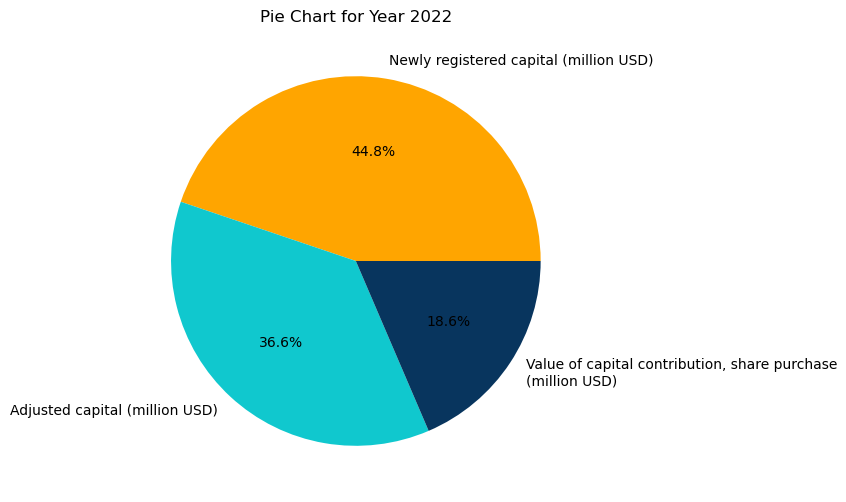

In [17]:
years = n_df['Year'].unique()
for year in years:
    # Filter data for each year
    df_year = n_df[n_df['Year'] == year]
    # Calculate the total each column
    pie_data = df_year[['Newly registered capital (million USD)', 
                        'Adjusted capital (million USD)', 
                        'Value of capital contribution, share purchase\n(million USD)']].sum()
    # Plot
    plt.figure(figsize=(8, 6))
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', 
            colors=['orange', '#10c8ce', '#08355e'])
    plt.title(f'Pie Chart for Year {year}')
    plt.show()

**From the pie charts of the years 2016-2022, we can infer the following:**
- The values have not fluctuated significantly in terms of proportion, with `Newly registered capital` consistently holding the largest share.
- `Although Adjusted project number and Adjusted capital` do not account for the majority, they have maintained stability. This demonstrates the effective and long-term collaboration in ongoing projects.
- The `Value of capital contribution, share purchase` saw a strong increase in investment from 2016 to 2019. By 2019, the investment nearly matched the Newly registered capital, showcasing *Vietnam's development potential*. However, due to the impact of *COVID-19*, there was a regression during the 2020-2022 period.

In [18]:
'''
This cell is used to create a heatmap of the correlation matrix for the selected year. The heatmap is interactive, allowing users to select a year using a slider widget. The heatmap shows the correlation between different columns in the dataset for the selected year. The correlation values range from -1 to 1, with -1 indicating a perfect negative correlation, 0 indicating no correlation, and 1 indicating a perfect positive correlation.
But it just in enviroment with runtime download and run it in your local machine.

'''
# Get the unique years in the dataset
years = n_df['Year'].unique()
# Initialize the Panel extension
pn.extension('plotly')
# Initialize the Panel widgets
year_slider = pn.widgets.IntSlider(name='Select Year', start=years[0], end=years[-1], step=1, value=years[0])
# Create a heatmap of the correlation matrix for the selected year
def create_pie_chart(year):
    df_year = n_df[n_df['Year'] == year]
    # Select the columns for the pie chart
    pie_data = df_year[['Number of new projects', 'Adjusted project number', 'Number of times of capital contribution to buy shares']].sum()
    # Create the pie chart
    fig = px.pie(pie_data, values=pie_data, names=pie_data.index, title=f'Pie Chart for Year {year}',
                 color_discrete_sequence=['orange', '#10c8ce', '#08355e'])
    fig.update_layout(width=800, height=700)
    return fig
# Update the pie chart based on the selected year
@pn.depends(year_slider)
def update_pie_chart(year):
    return create_pie_chart(year)
# Show the pie chart
pn.Column(year_slider, update_pie_chart).servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'c3f45c21-7ece-4abe-b6dd-e0314232fe46': {'version…

#### Ranking Industry get total investment each year

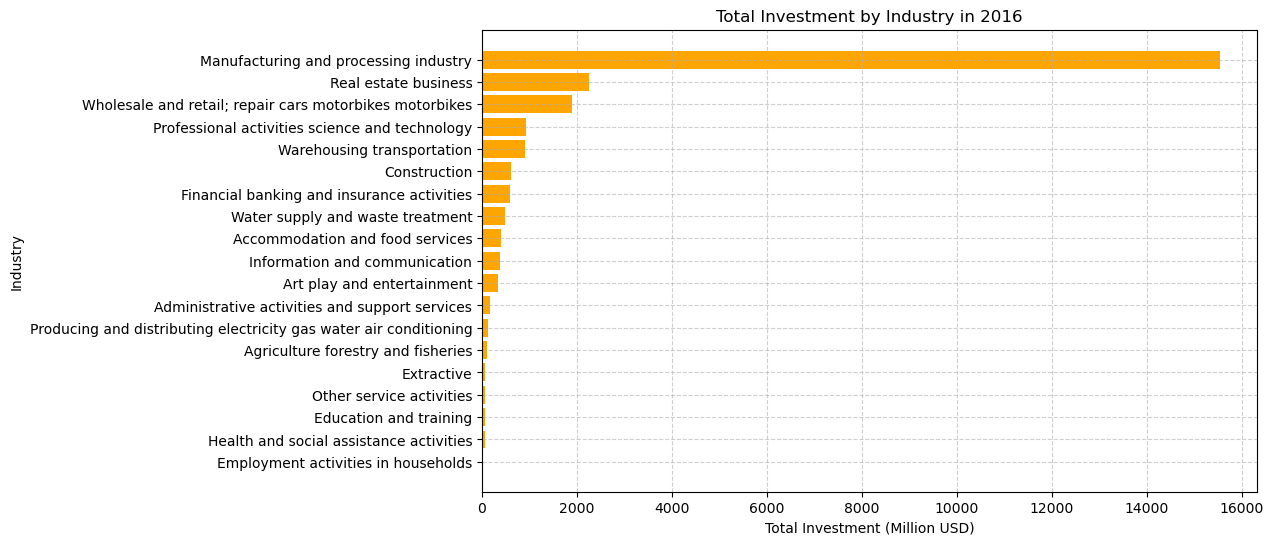

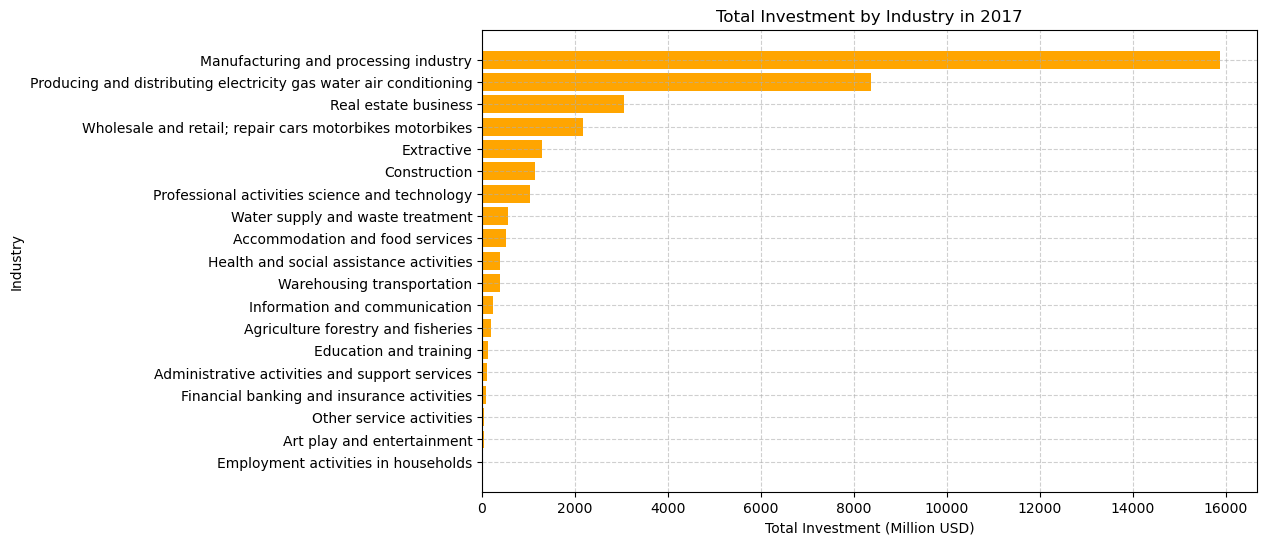

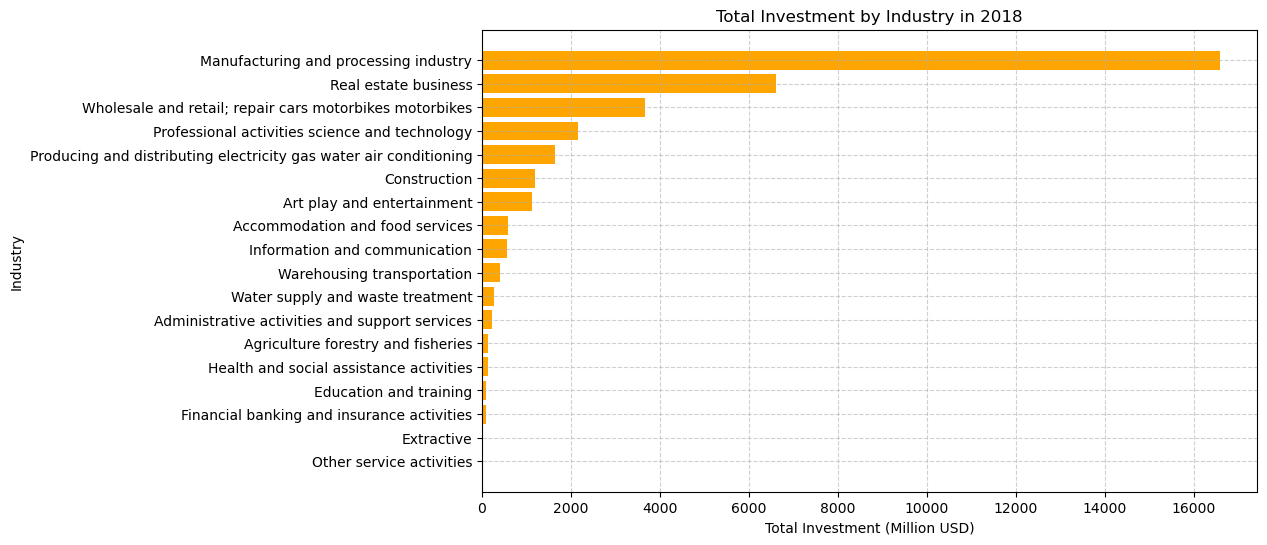

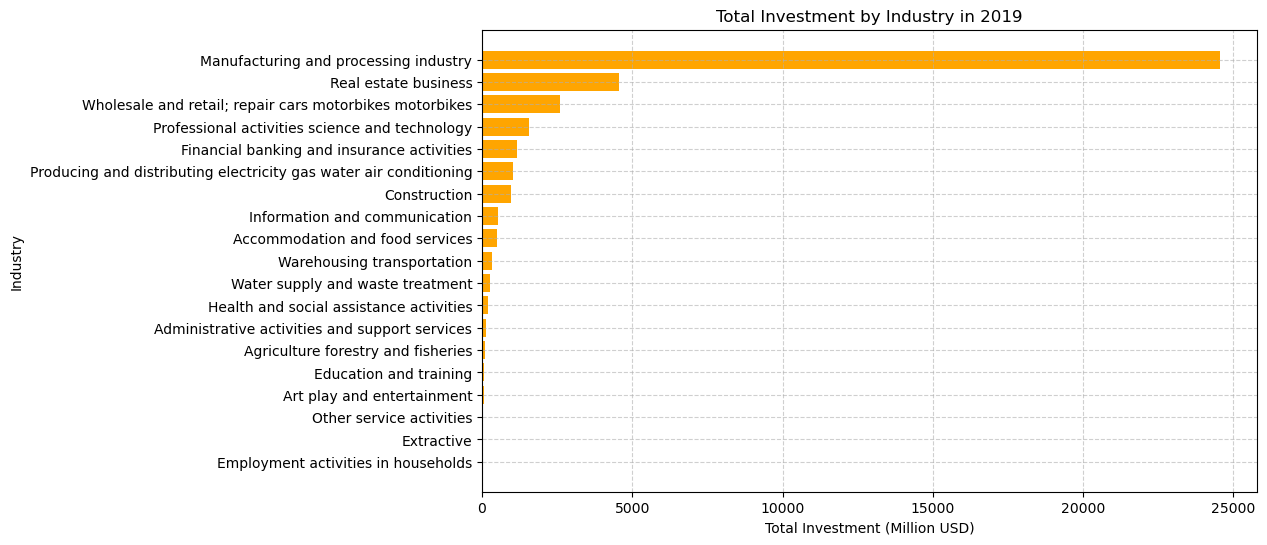

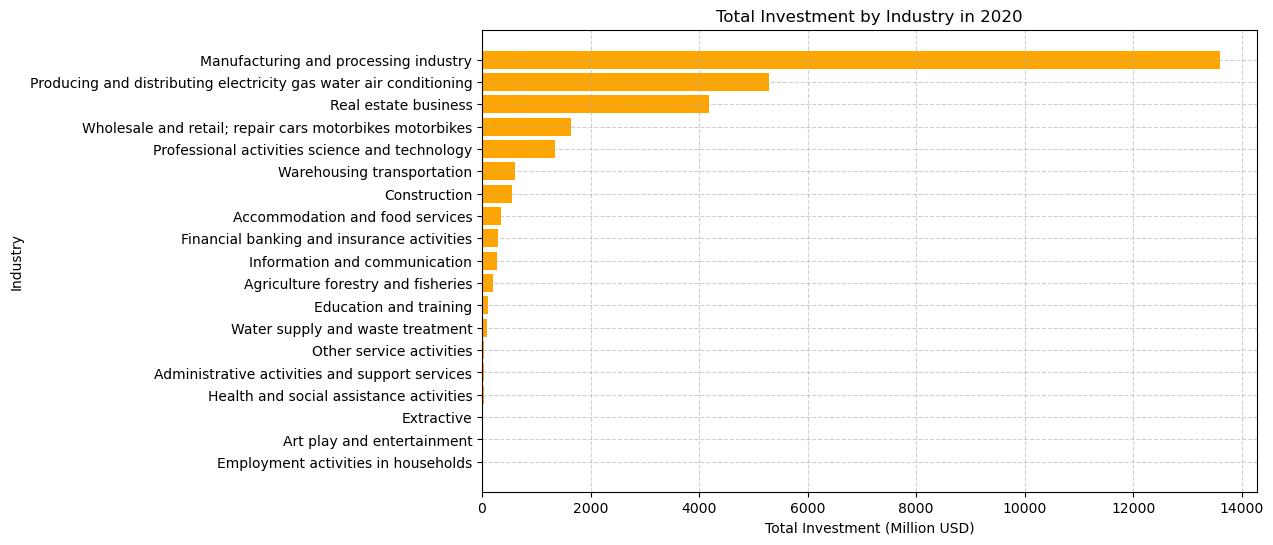

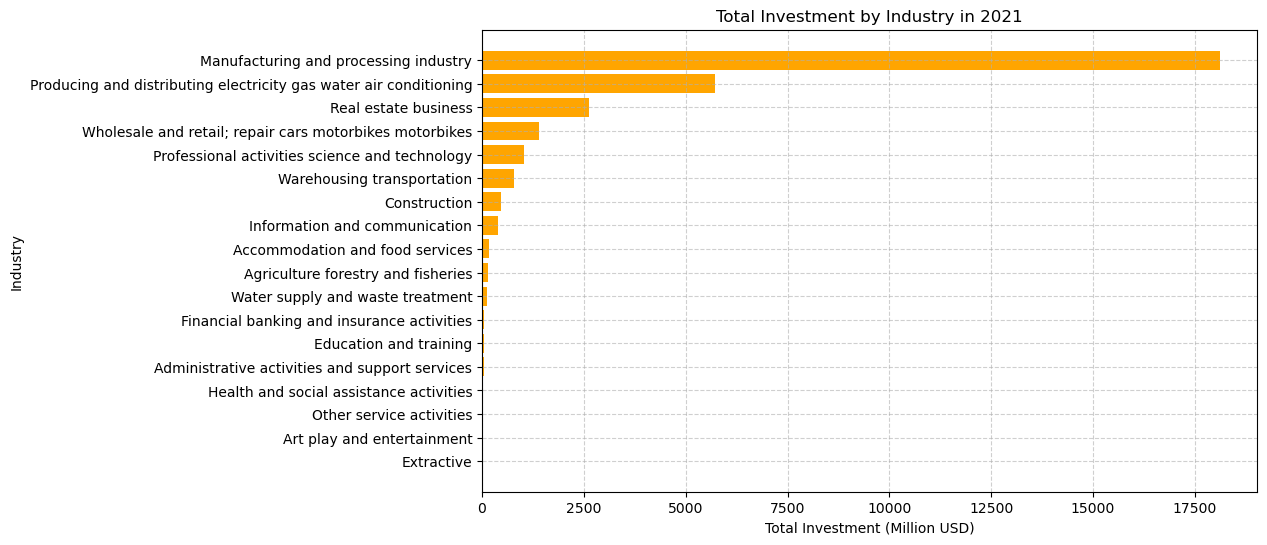

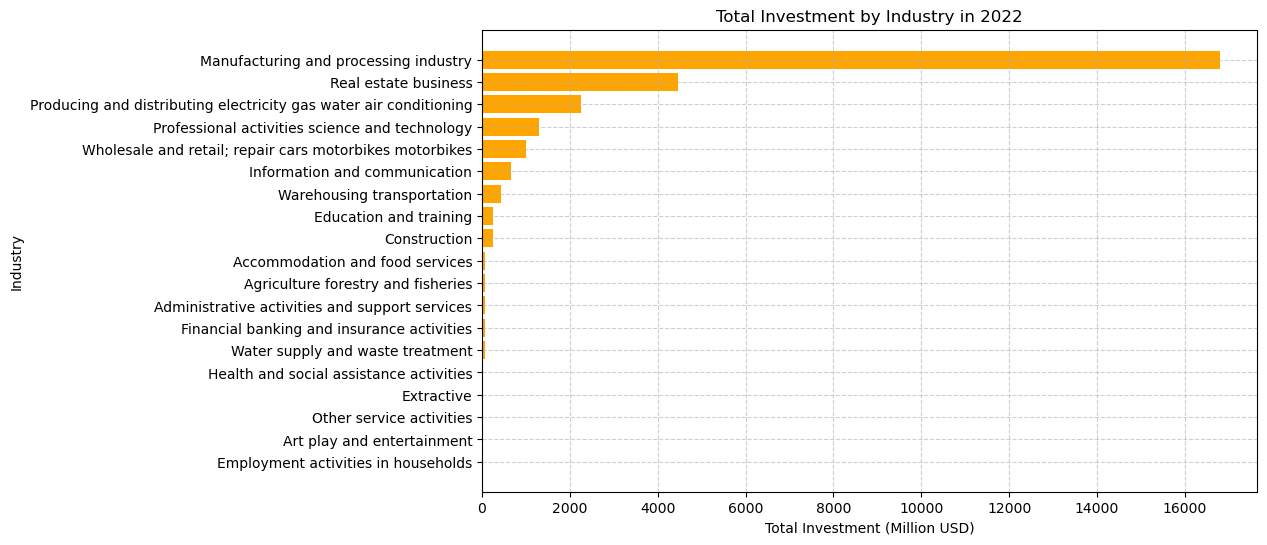

In [19]:
years = n_df['Year'].unique()
# Loop through each year and plot the total investment by industry
for year in years:
    # Filter data by year
    df_year = n_df[n_df['Year'] == year]
    # Sort the data by Total investment
    df_year.sort_values('Total investment', ascending=True, inplace=True)
    # Set axis values
    x = df_year['Industry'].values
    y = df_year['Total investment'].values
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(x, y, color='orange')
    plt.xlabel('Total Investment (Million USD)')
    plt.ylabel('Industry')
    plt.title(f'Total Investment by Industry in {year}')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [20]:
# Create a pivot table
pivot_df = n_df.pivot_table(index='Industry', columns='Year', values='Total investment', aggfunc='sum')
# Sort the data by the total investment in 2020
pivot_df = pivot_df.sort_values(by=2020, ascending=True)
pivot_df.fillna(0, inplace=True)
pivot_df

Year,2016,2017,2018,2019,2020,2021,2022
Industry,,,,,,,
Employment activities in households,4.05,0.50,0.00,0.43,2.70,0.00,0.55
Art play and entertainment,329.80,37.72,1133.64,62.73,5.16,1.68,3.65
Extractive,70.02,1288.90,25.40,35.59,6.37,1.48,19.09
Health and social assistance activities,52.08,387.53,132.81,211.45,32.57,4.52,20.73
Administrative activities and support services,160.36,109.03,213.97,123.61,40.38,46.53,64.15
Other service activities,67.76,48.74,7.76,47.07,43.77,3.60,5.61
Water supply and waste treatment,488.26,568.00,259.20,249.27,88.01,116.93,57.44
Education and training,60.67,119.97,90.72,64.62,108.34,51.08,253.48
Agriculture forestry and fisheries,99.48,191.55,140.84,99.32,210.64,156.78,68.37


### Multiple horizontal bar ranking of Industry

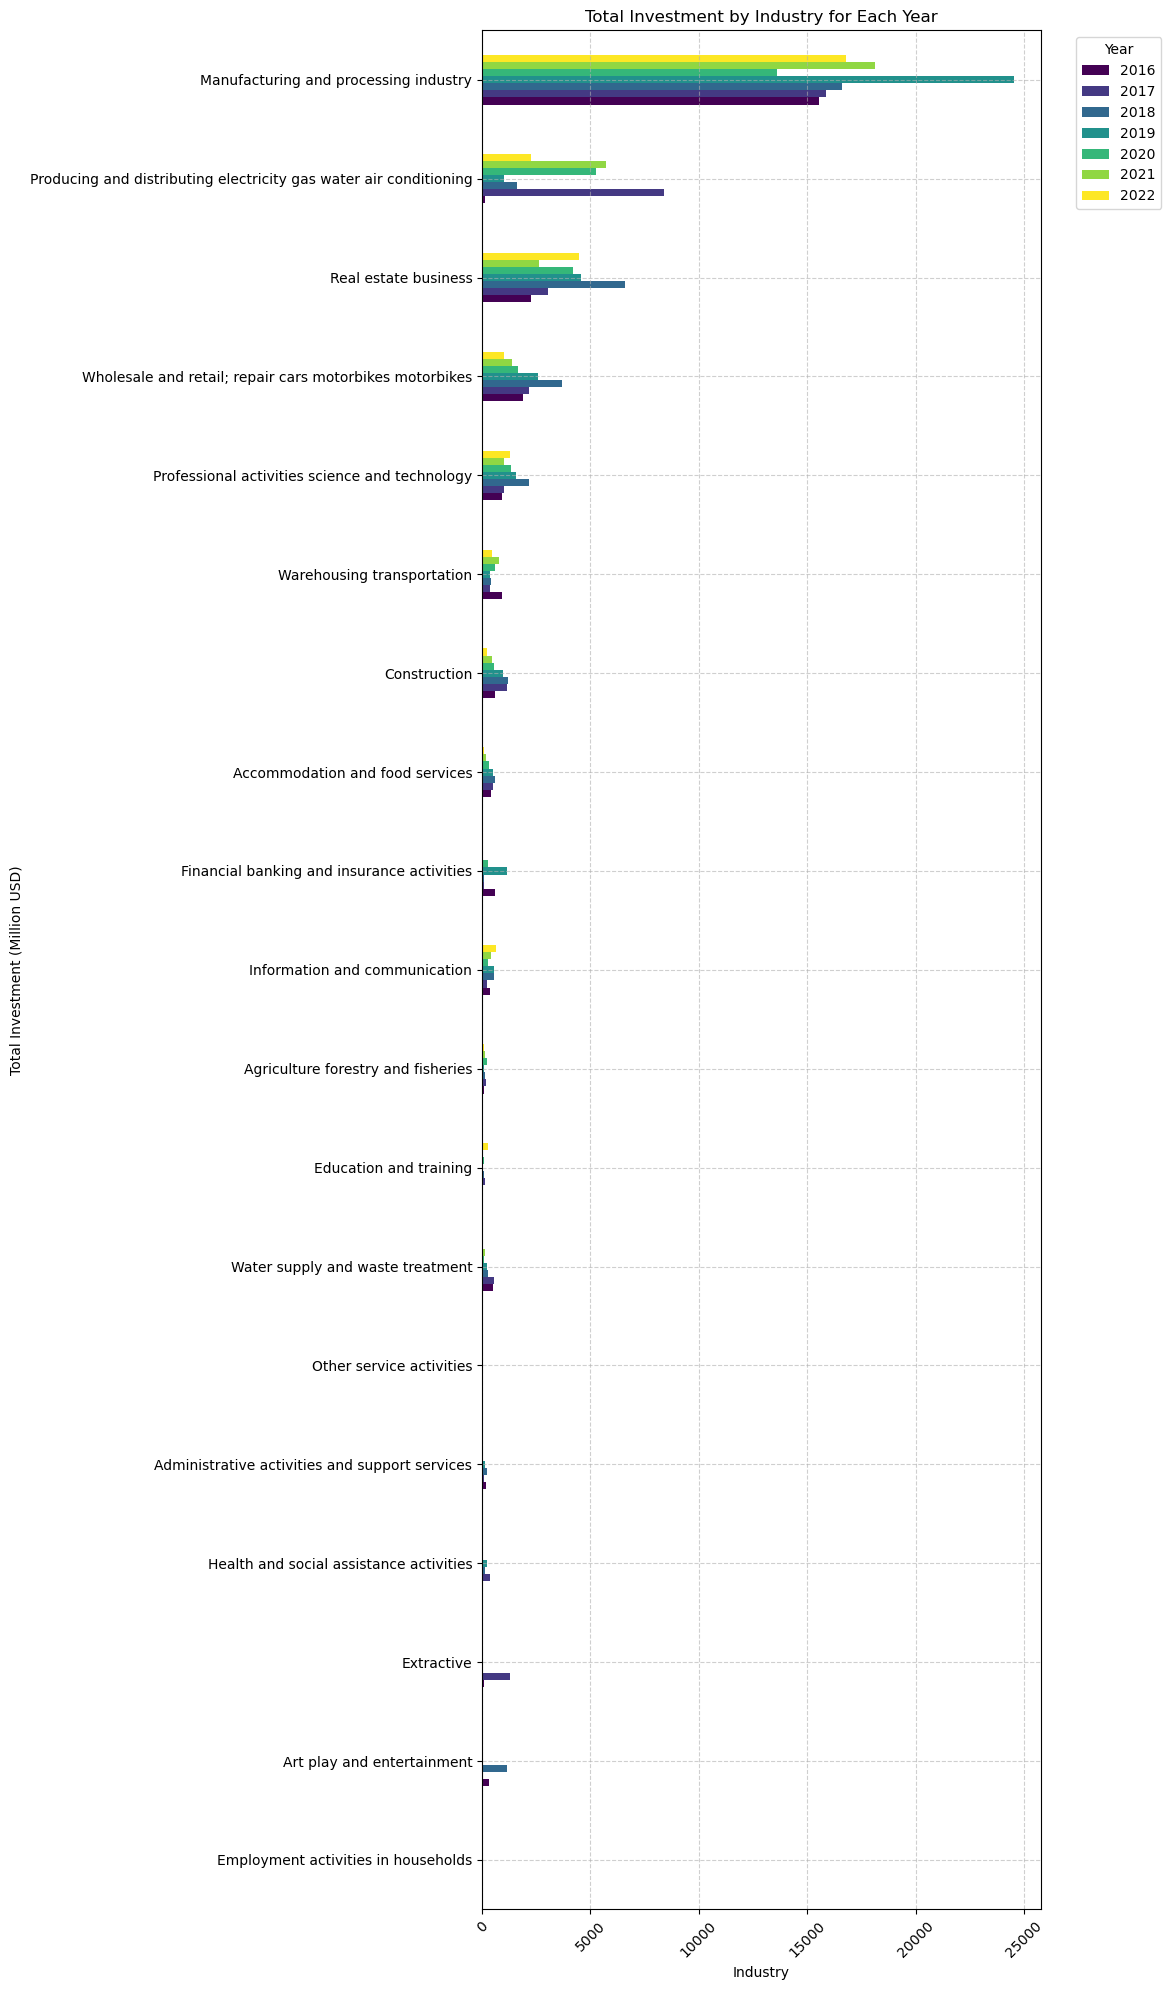

In [21]:
# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 20))  # Set the figure size
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
# Plot the bar chart
pivot_df.plot(kind='barh', width=0.5, ax=ax, color=colors )
plt.xlabel('Industry')
plt.ylabel('Total Investment (Million USD)')
plt.title('Total Investment by Industry for Each Year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
per_of_total = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100
# Sort the data of all years by the total percentage of investment
by = per_of_total.columns[-1]
per_of_total.sort_values(by, ascending = False, inplace = True)
per_of_total

Year,2016,2017,2018,2019,2020,2021,2022
Industry,,,,,,,
Manufacturing and processing industry,62.251732,44.589027,46.767449,63.421622,47.444168,58.166714,60.485004
Real estate business,8.994926,8.576372,18.650914,11.799698,14.598203,8.465927,16.026044
Producing and distributing electricity gas water air conditioning,0.530549,23.519266,4.599286,2.646731,18.418129,18.334336,8.141880
Professional activities science and technology,3.738158,2.887419,6.054323,4.045082,4.697154,3.286902,4.641431
Wholesale and retail; repair cars motorbikes motorbikes,7.608722,6.076958,10.355181,6.682827,5.740389,4.506771,3.636633
Information and communication,1.479430,0.664763,1.581316,1.385569,0.946296,1.298063,2.359252
Warehousing transportation,3.650220,1.085742,1.143330,0.893571,2.134572,2.515941,1.578870
Education and training,0.243060,0.336946,0.255771,0.166857,0.377918,0.163963,0.912497
Construction,2.445419,3.182264,3.335485,2.527979,1.952904,1.467836,0.890754


**From the ranking plot and multiple barh , we can have below observations:**
- `Manufacturing and processing industry` from 2016-2022 has consistently been the industry with the largest investment proportion, ranging from *44-63%*.
- `Manufacturing and processing industry` was significantly impacted by COVID-19 in 2019-2020, with a decrease of *$11 billion*.
- `Real estate business` gradually recovered after 2020, with a continued high demand for real estate.
- `Professional activities science and technology` remained stable, showing that Vietnam's scientific and technological expertise continues to be highly trusted.
- `Warehousing transportation` experienced strong growth during the boom of e-commerce platforms, with the logistics industry driving significant growth in this sector.
- `Wholesale and retail; repair cars motorbikes motorbikes` accounted for a significant proportion, demonstrating that Vietnam consistently has a high demand for personal transportation.

## **Bivariate Analysis**

###  Compare two trendlines

In [23]:
# Group by year
group_year_df = n_df.groupby('Year')
# Print the size of each group
print(group_year_df.size())

Year
2016    19
2017    19
2018    18
2019    19
2020    19
2021    18
2022    19
dtype: int64


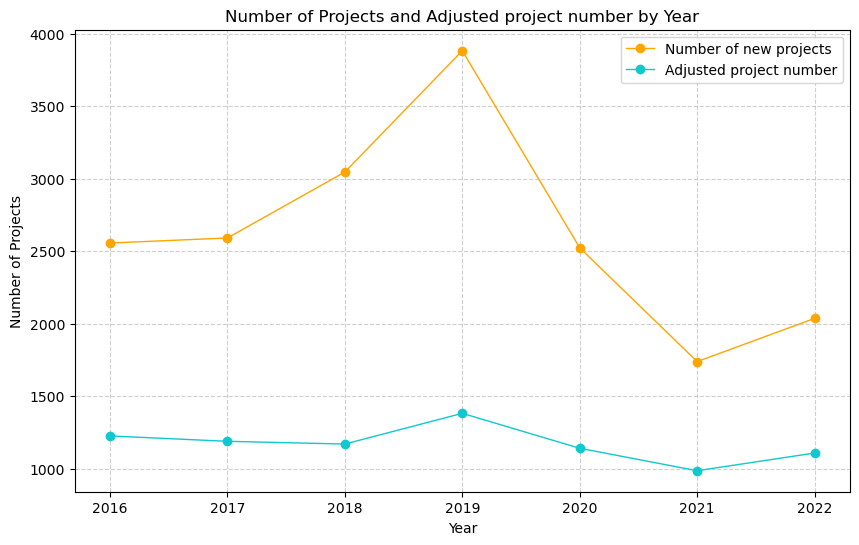

In [24]:
# Set axis values
x = group_year_df['Year'].unique()
y1 = group_year_df['Number of new projects'].sum()
y2 = group_year_df['Adjusted project number'].sum()
# Plot
plt.figure(figsize=(10, 6))
# Line for Number of new projects
plt.plot(x, y1, marker='o', color='orange', label='Number of new projects',linewidth=1)
# Line for Adjusted project number
plt.plot(x, y2, marker='o', color='#10c8ce', label='Adjusted project number',linewidth=1)
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.title('Number of Projects and Adjusted project number by Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

`Number of new projects` and `Adjusted project number` are directly proportional to each other, which reflects the growing trust in Vietnam from the international community, both from new and existing investment partners.

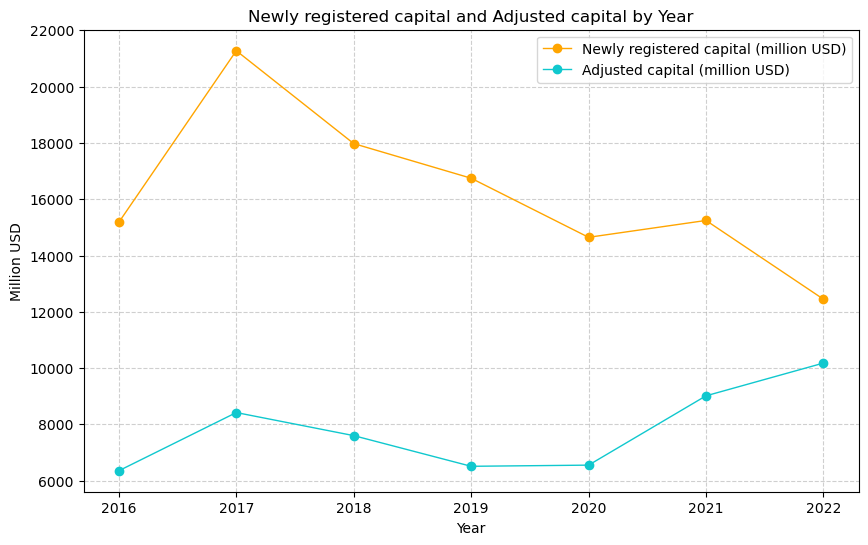

In [25]:
# Set axis values
x = group_year_df['Year'].unique()
y1 = group_year_df['Newly registered capital (million USD)'].sum()
y2 = group_year_df['Adjusted capital (million USD)'].sum()
# Plot
plt.figure(figsize=(10, 6))
# Line for Number of new projects
plt.plot(x, y1, marker='o', color='orange', label='Newly registered capital (million USD)',linewidth=1)
# Line for Adjusted project number
plt.plot(x, y2, marker='o', color='#10c8ce', label='Adjusted capital (million USD)',linewidth=1)
plt.xlabel('Year')
plt.ylabel('Million USD')
plt.title('Newly registered capital and Adjusted capital by Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The global *recession/economic downturn* has caused a significant drop in `Newly registered capital (million USD)`. However, `Adjusted capital (million USD)` has still increased, demonstrating a strong and ongoing partnership with investment partners.

### Pairplot correlated data

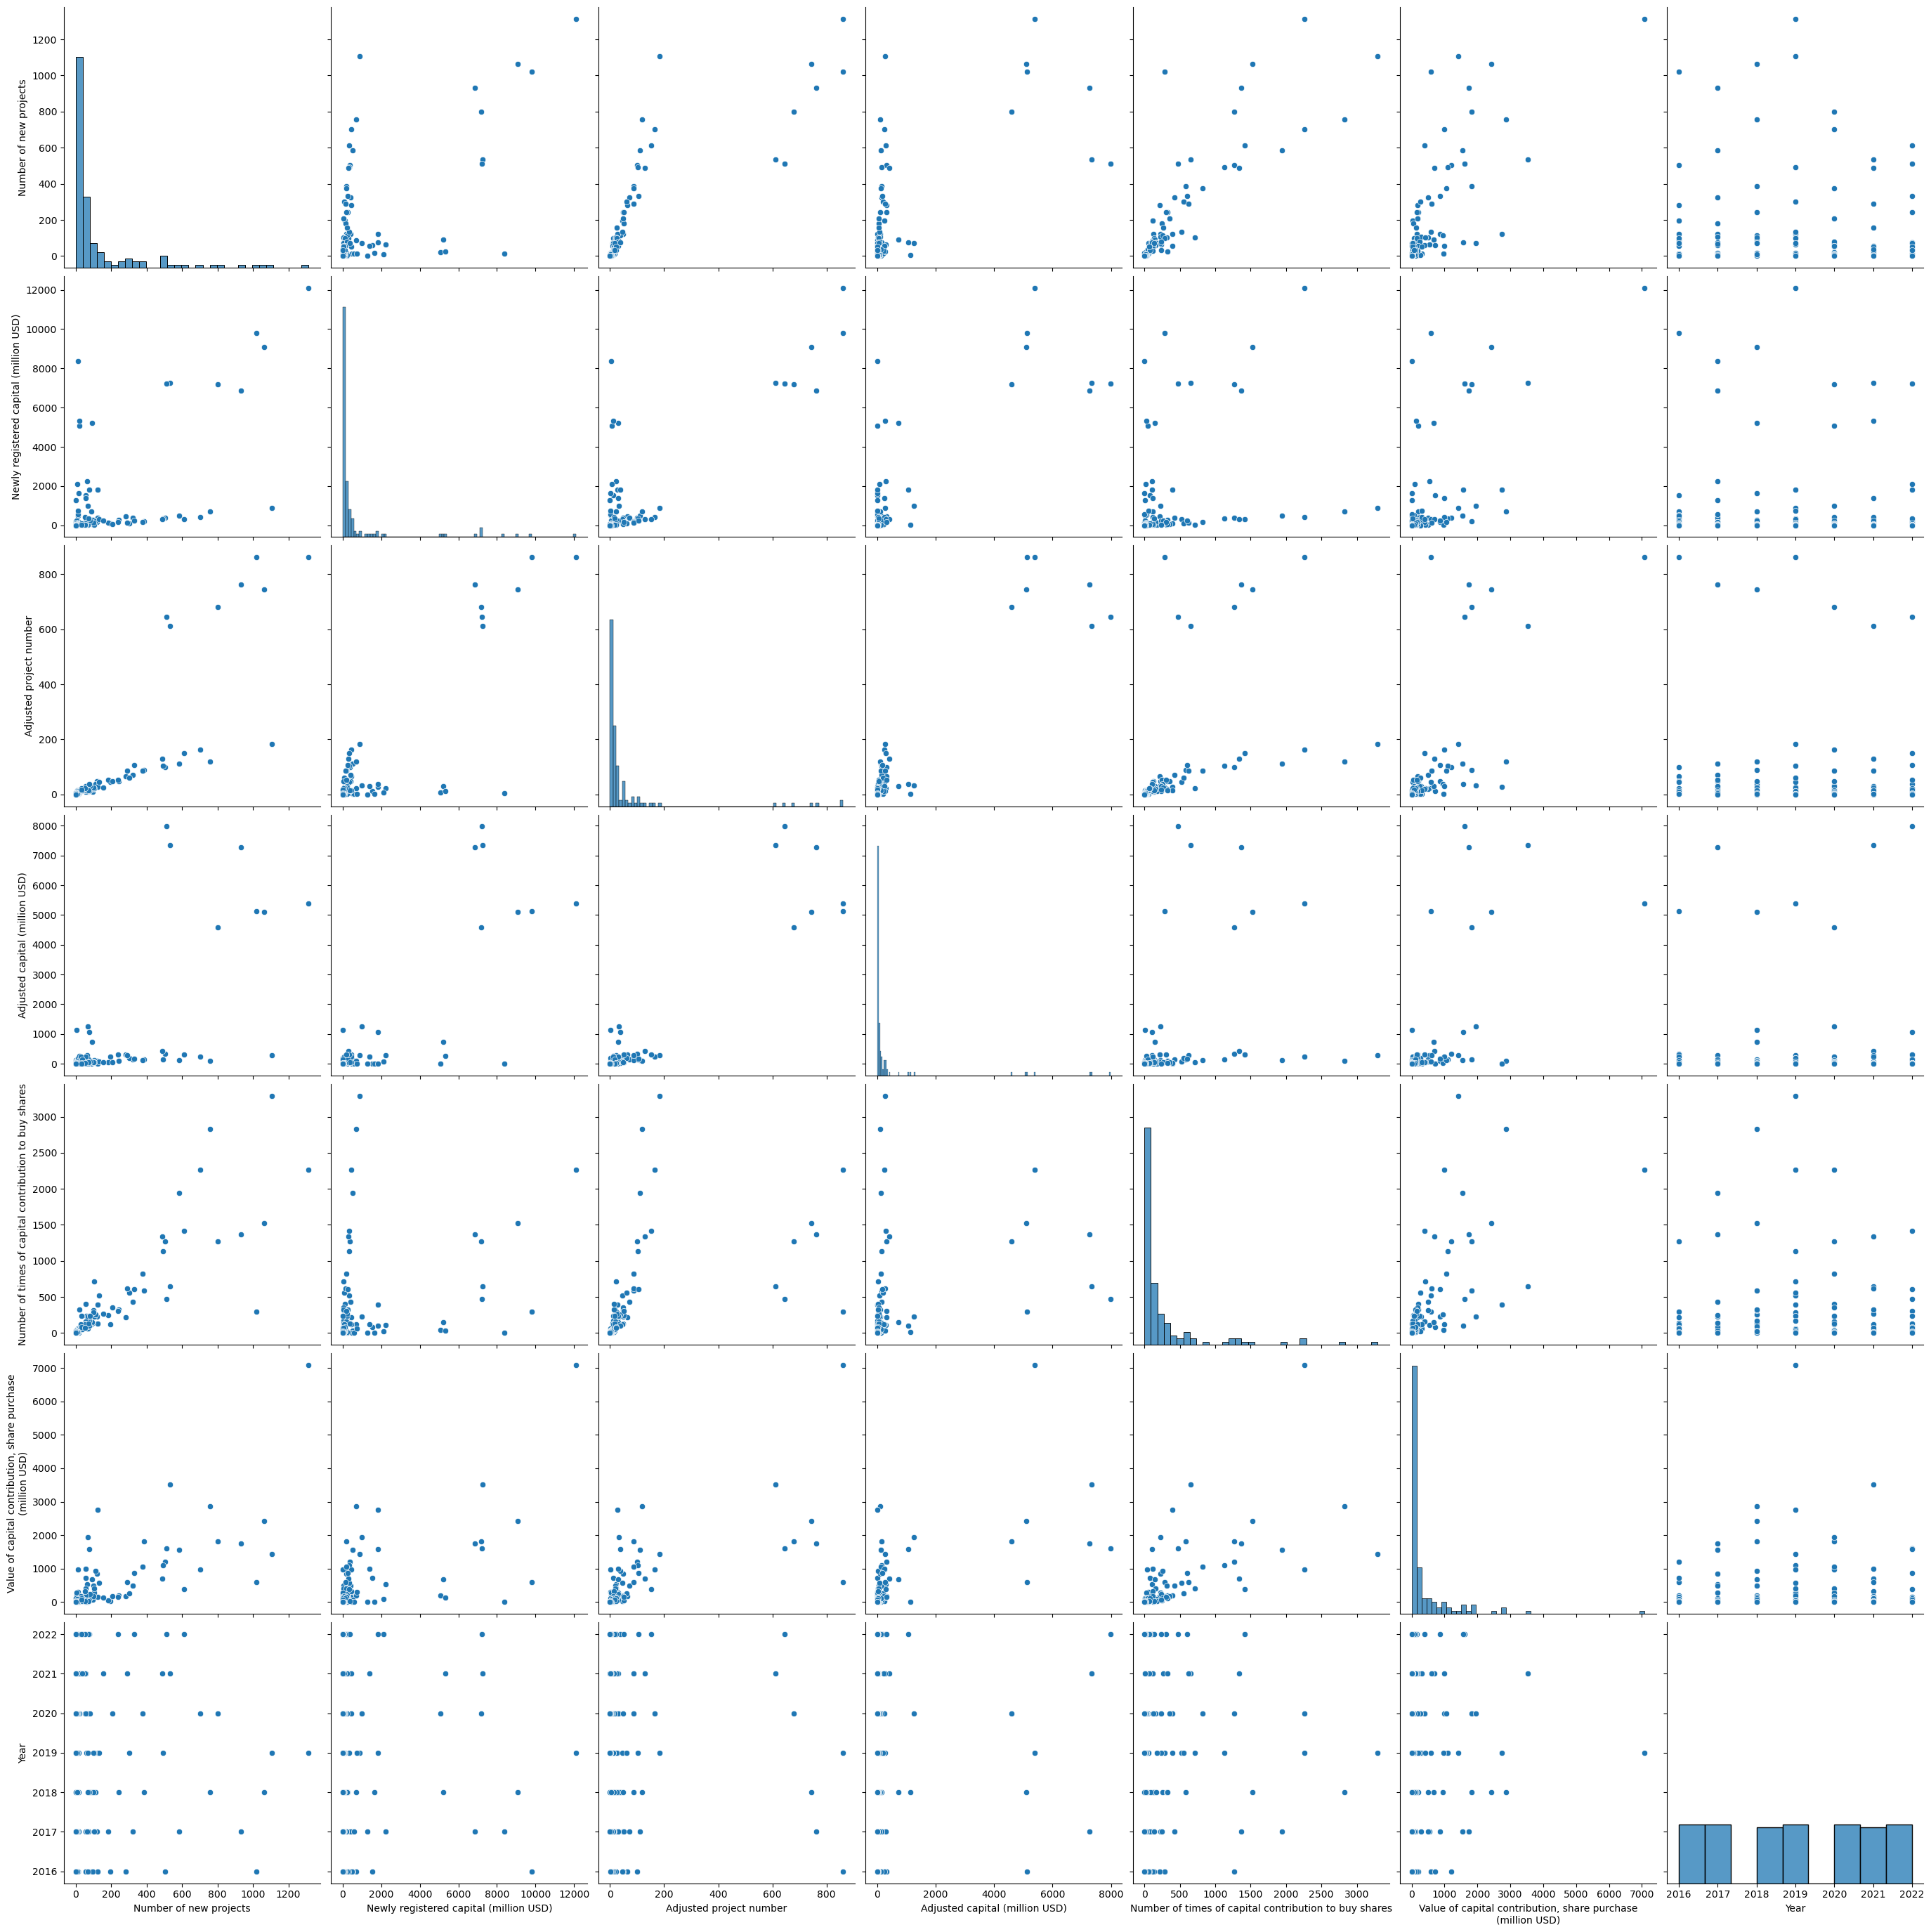

In [26]:
sns.pairplot(data=n_df.drop(['Industry','Total investment'],axis=1), height=4)
plt.show()

## **Multivariate Analysis**

### Compare three trendlines

In [27]:
# Group by year
group_year_df = n_df.groupby('Year')
# Print the size of each group
print(group_year_df.size())

Year
2016    19
2017    19
2018    18
2019    19
2020    19
2021    18
2022    19
dtype: int64


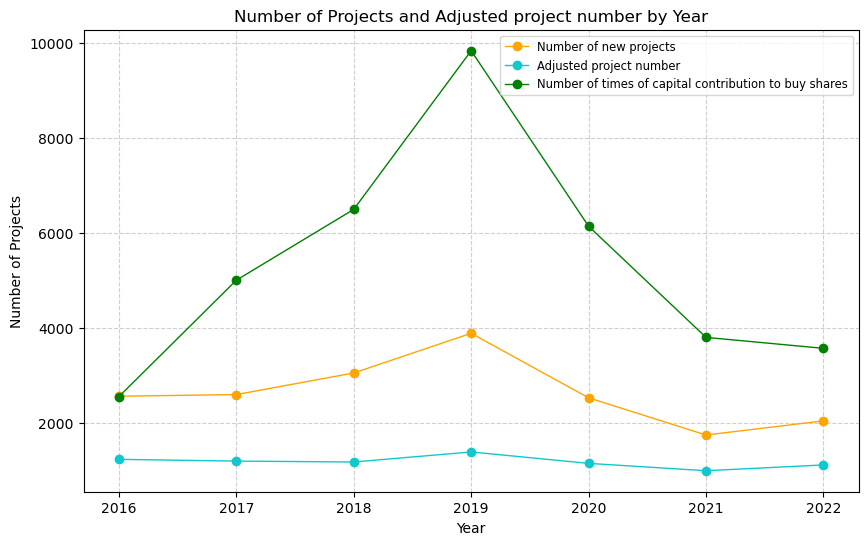

In [28]:
# Set axis values
x = group_year_df['Year'].unique()
y1 = group_year_df['Number of new projects'].sum()
y2 = group_year_df['Adjusted project number'].sum()
y3 = group_year_df['Number of times of capital contribution to buy shares'].sum()
# Plot
plt.figure(figsize=(10, 6))
# Line for Number of new projects
plt.plot(x, y1, marker='o', color='orange', label='Number of new projects',linewidth=1)
# Line for Adjusted project number
plt.plot(x, y2, marker='o', color='#10c8ce', label='Adjusted project number',linewidth=1)
# Line for Number of times of capital contribution to buy shares
plt.plot(x, y3, marker='o', color='green', label='Number of times of capital contribution to buy shares',linewidth=1)
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.title('Number of Projects and Adjusted project number by Year')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

`Number of new projects`, `Adjusted project number` and `Number of times of capital contribution to buy shares` are a similar line pattern, indicating stability in both collaboration and investment.

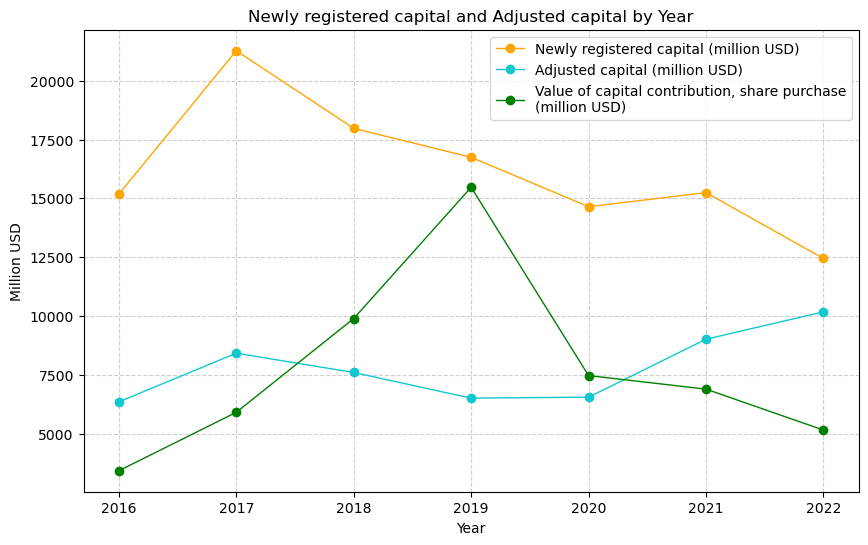

In [29]:
# Set axis values
x = group_year_df['Year'].unique()
y1 = group_year_df['Newly registered capital (million USD)'].sum()
y2 = group_year_df['Adjusted capital (million USD)'].sum()
y3 = group_year_df['Value of capital contribution, share purchase\n(million USD)'].sum()
# Plot
plt.figure(figsize=(10, 6))
# Line for Number of new projects
plt.plot(x, y1, marker='o', color='orange', label='Newly registered capital (million USD)',linewidth=1)
# Line for Adjusted project number
plt.plot(x, y2, marker='o', color='#10c8ce', label='Adjusted capital (million USD)',linewidth=1)
# Line for Adjusted project number
plt.plot(x, y3, marker='o', color='green', label='Value of capital contribution, share purchase\n(million USD)',linewidth=1)
plt.xlabel('Year')
plt.ylabel('Million USD')
plt.title('Newly registered capital and Adjusted capital by Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

`Newly registered capital` continues to hold the largest proportion of Total investment, with `Adjusted capital` showing similar trends as mentioned in the previous chart. The *recession/economic downturn* has led to a significant decline in `Value of capital contribution, share purchase` in Vietnam during the 2020-2022 period.

In [30]:
'''
This cell is used to create a heatmap of the correlation matrix for the selected year. The heatmap is interactive, allowing users to select a year using a slider widget. The heatmap shows the correlation between different columns in the dataset for the selected year. The correlation values range from -1 to 1, with -1 indicating a perfect negative correlation, 0 indicating no correlation, and 1 indicating a perfect positive correlation.
But it just in enviroment with runtime download and run it in your local machine.

'''
# Get the unique years in the dataset
years = n_df['Year'].unique()
# Initialize the Panel extension
pn.extension('plotly')
# Initialize slider widget
year_slider = pn.widgets.IntSlider(name='Select Year', start=years[0], end=years[-1], step=1, value=years[0])
# Create a function to generate a heatmap for a given year
def create_heatmap(year):
    df_year = n_df[n_df['Year'] == year].drop(columns=['Industry', 'Year'])
    corr_matrix = df_year.corr()
    # Create the heatmap
    fig = px.imshow(corr_matrix, text_auto=True, aspect="auto", color_continuous_scale='Viridis')
    fig.update_layout(title=f'Correlation Heatmap for Year {year}', width=800, height=700)
    return fig
# Update the heatmap based on the selected year
@pn.depends(year_slider)
def update_heatmap(year):
    return create_heatmap(year)
# Show the heatmap
pn.Column(year_slider, update_heatmap).servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'b83e0dbf-7f79-4f2c-b71c-936e8799c9b8': {'version…

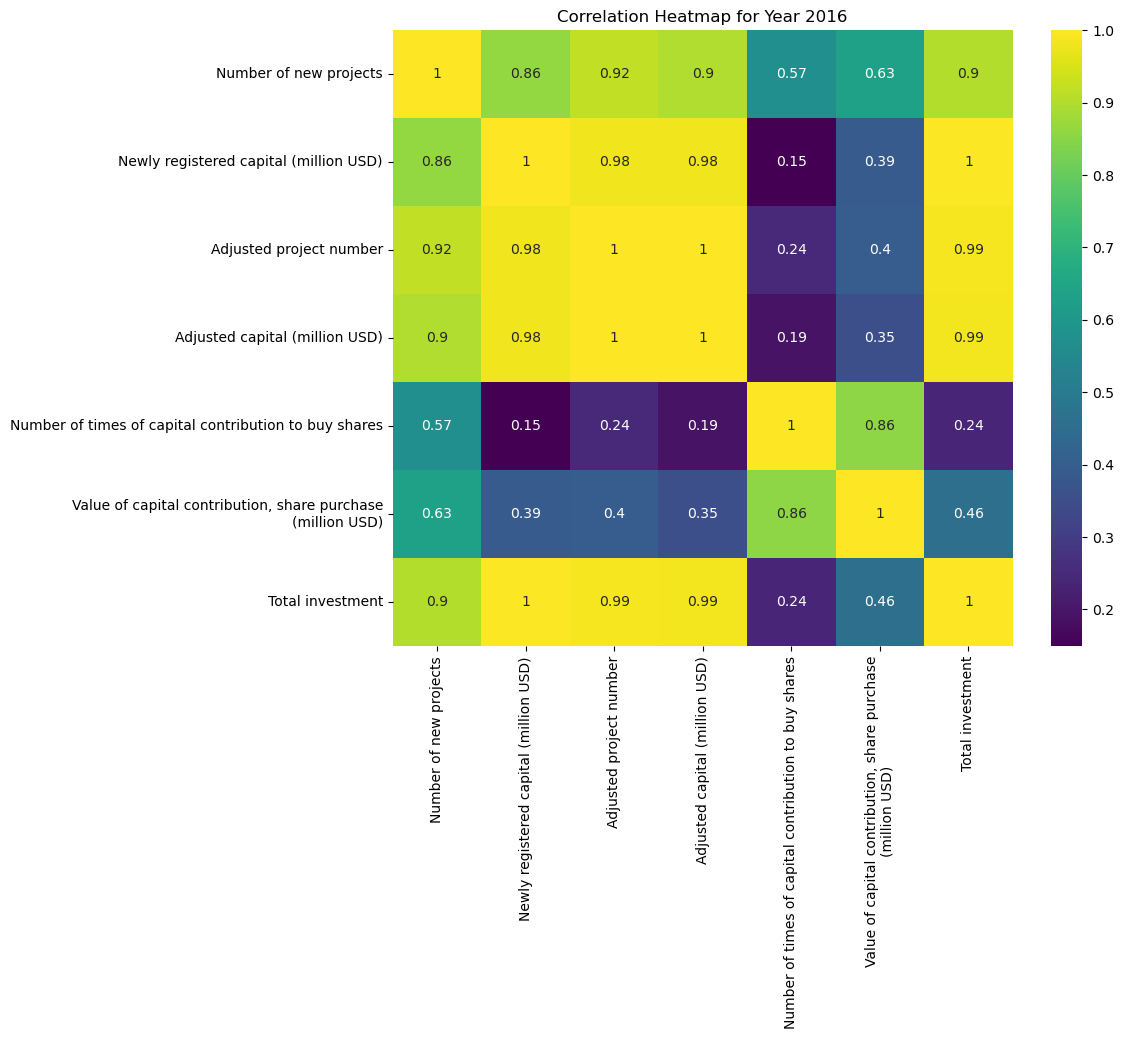

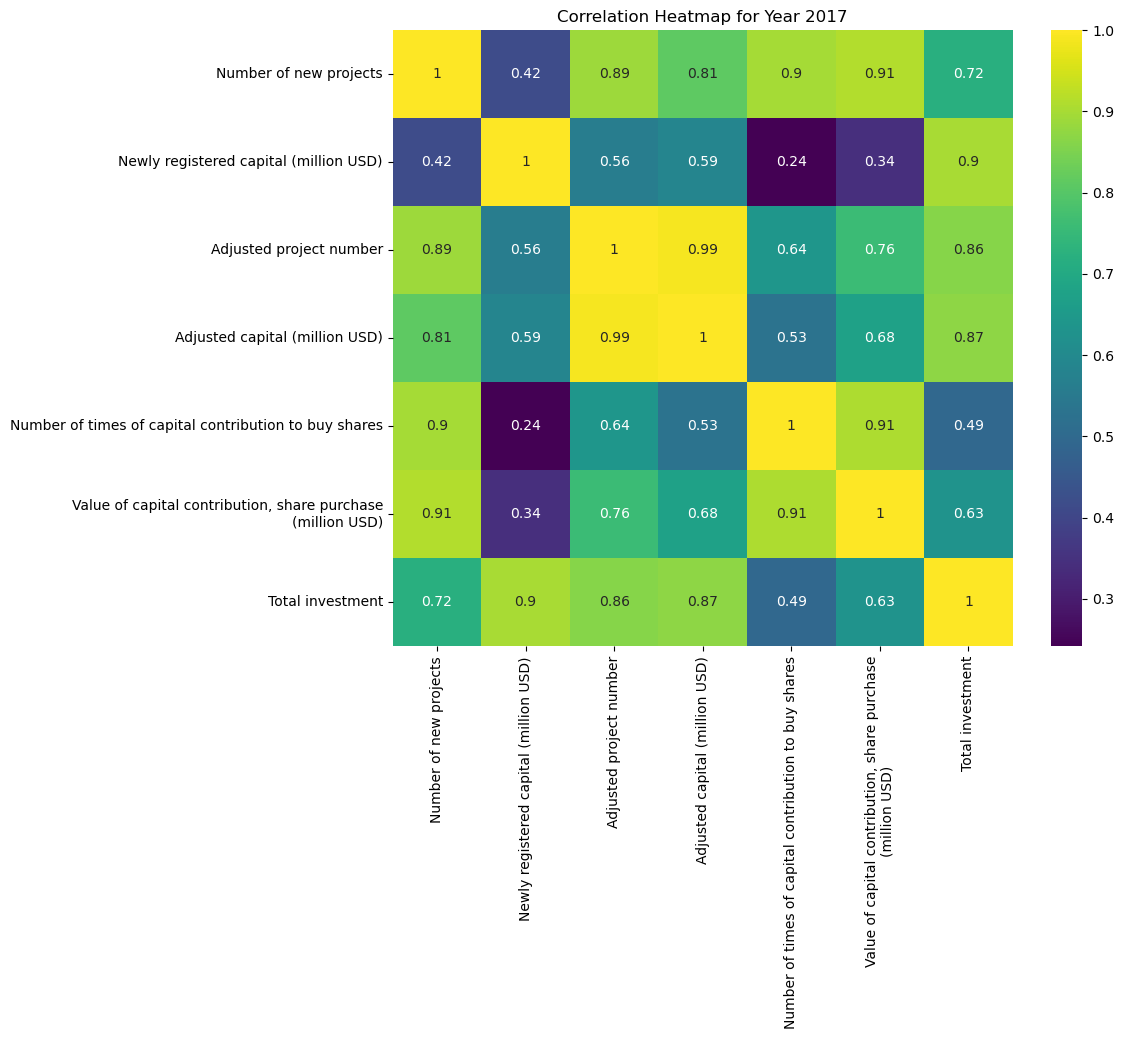

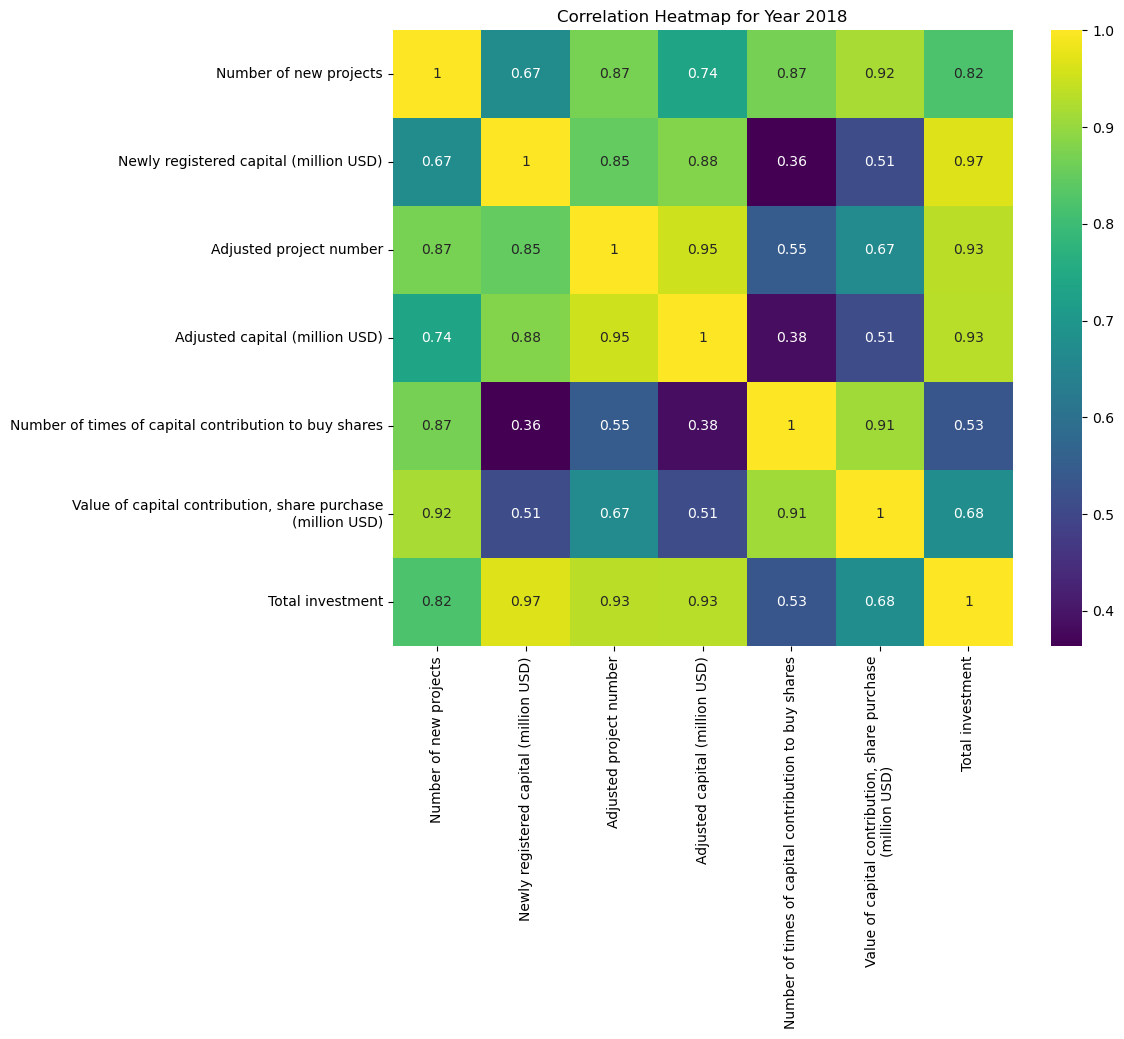

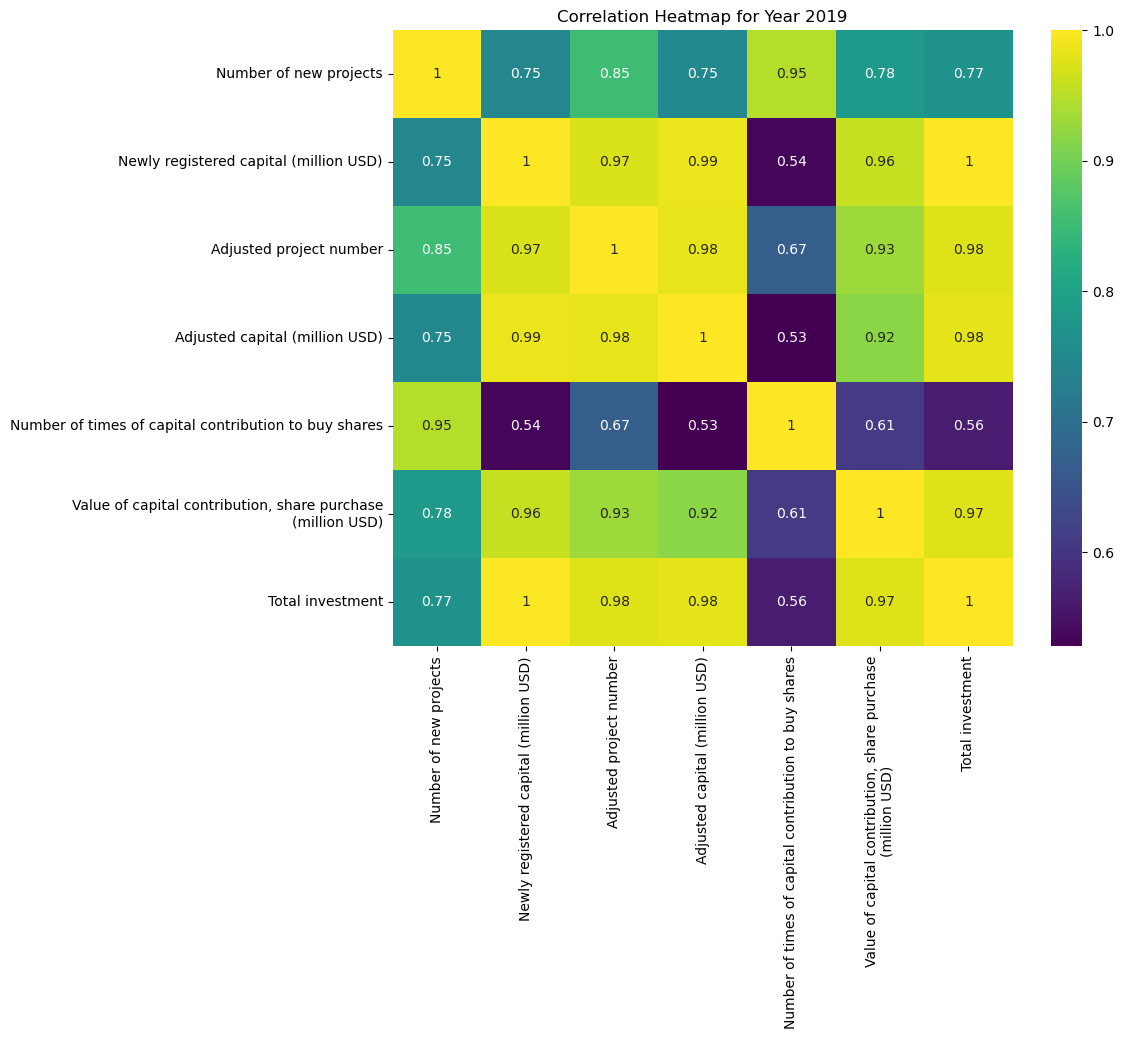

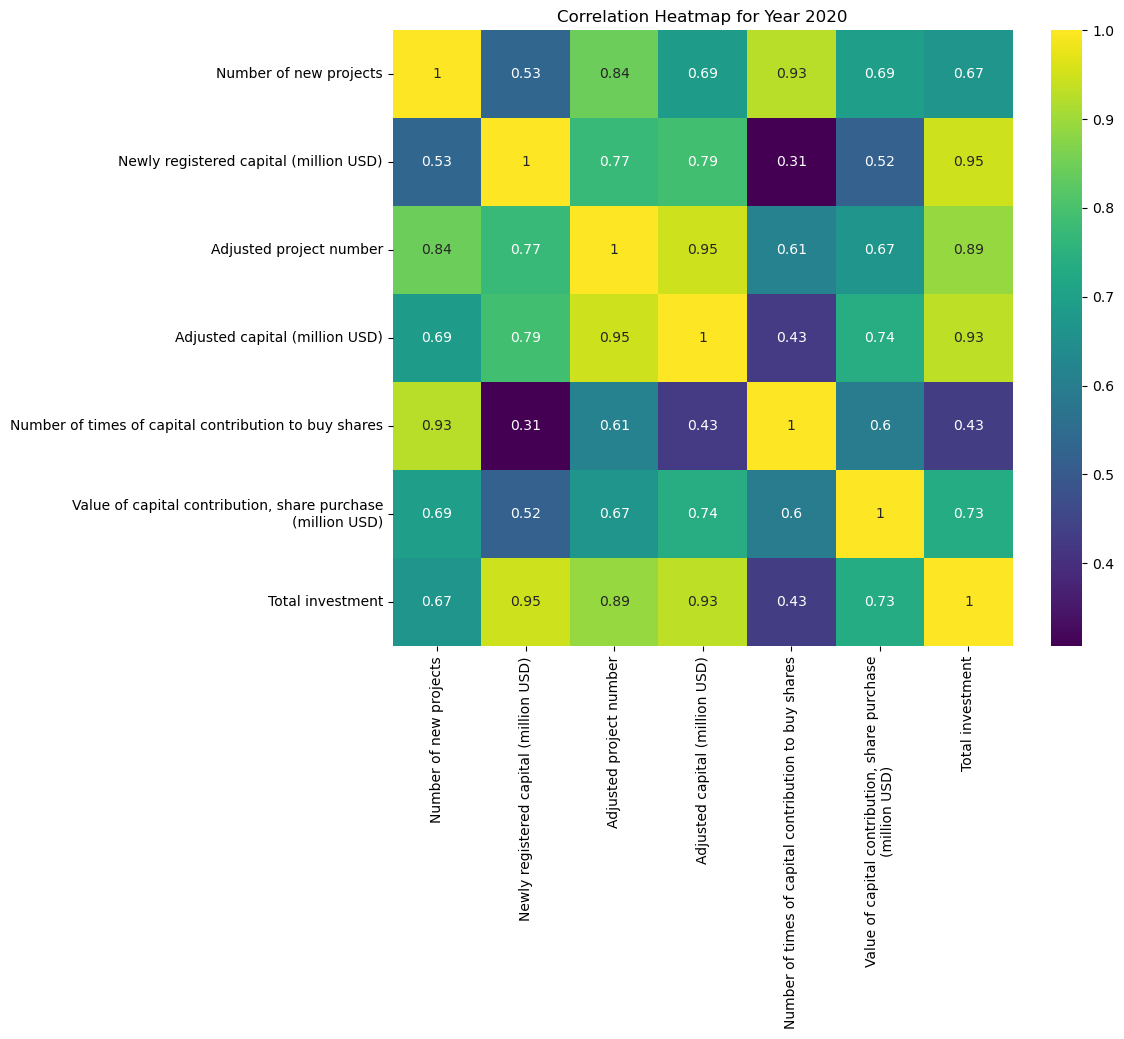

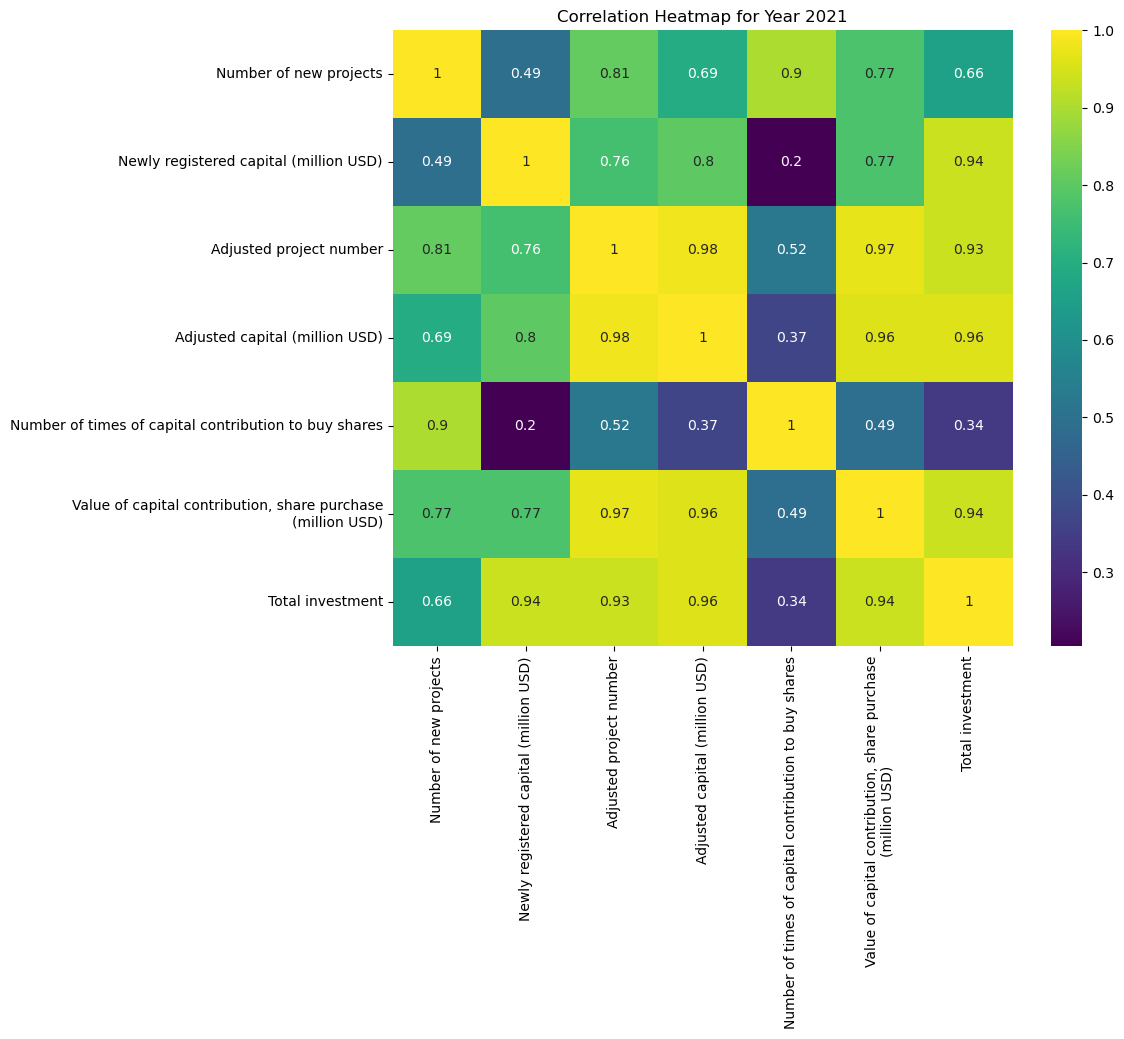

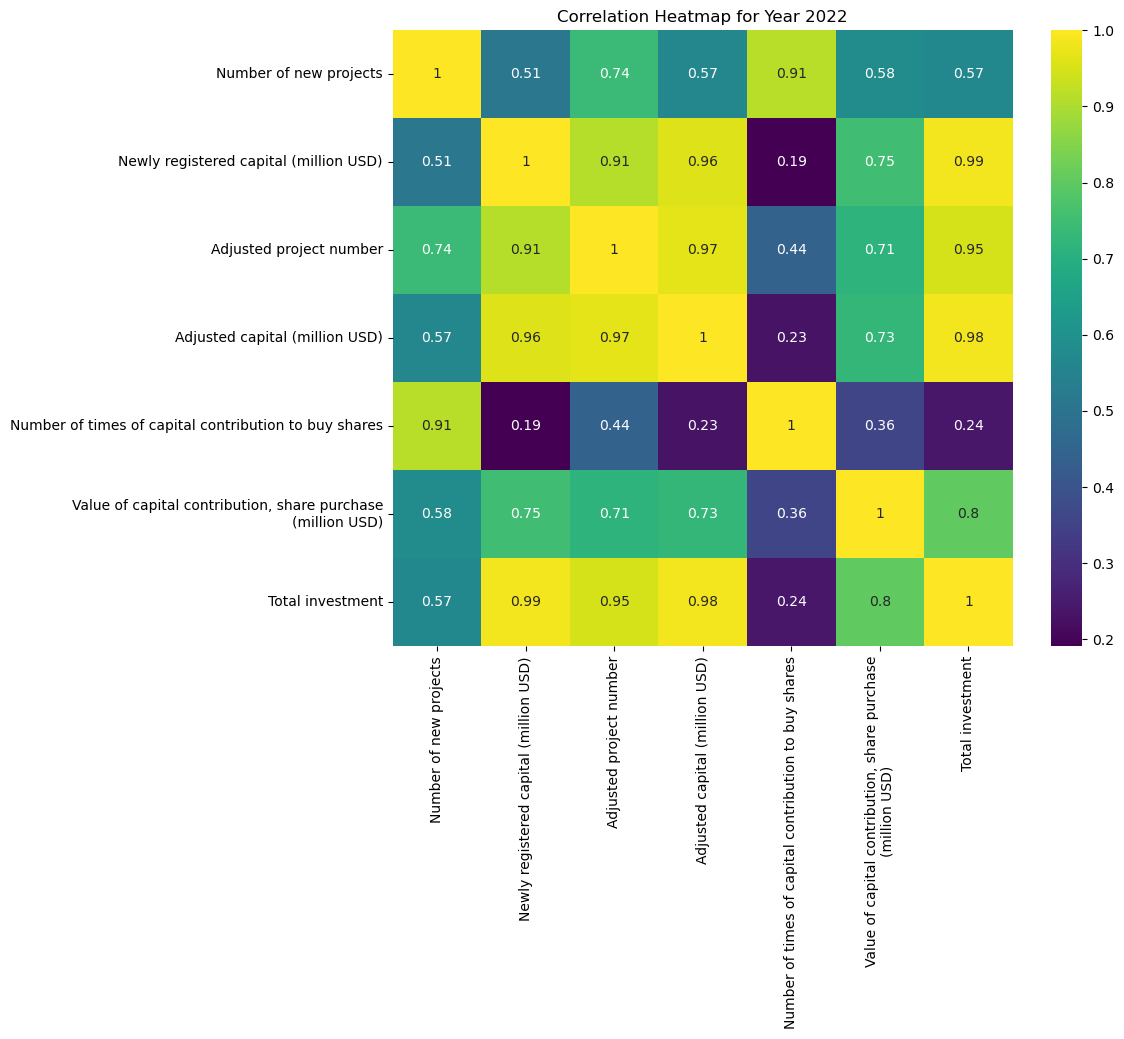

In [31]:
years = n_df['Year'].unique()
for year in years:
    # Filter data by year
    df_year = n_df[n_df['Year'] == year].drop(columns=['Industry', 'Year'])
    # Create the correlation matrix
    corr_matrix = df_year.corr()
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='viridis', cbar=True)
    plt.title(f'Correlation Heatmap for Year {year}')
    # Show the plot
    plt.show()

## **Forecast**

Total investment forecast for 2023: 30730.11 million USD
Total investment forecast for 2024: 30471.11 million USD


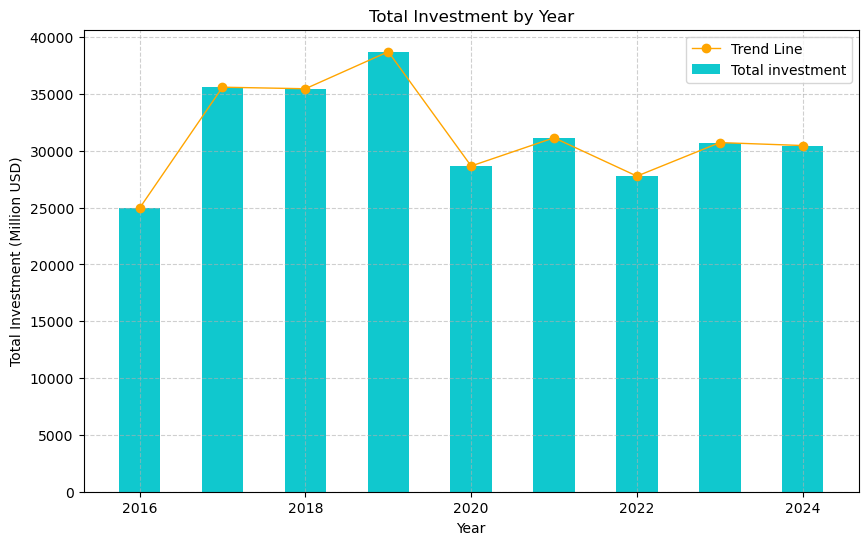

In [32]:
# Create model
X = total_investment_by_year[['Year']].values
y = total_investment_by_year['Total investment'].values
model = LinearRegression()
model.fit(X, y)
# Predict the total investment for the next 2 years
future_years = np.array([[2023], [2024]])
predictions = model.predict(future_years)
# Create new df for forecast
forecast_df = pd.concat([
    total_investment_by_year,
    pd.DataFrame({'Year': [2023, 2024], 'Total investment': predictions})
], ignore_index=True)
# Print the forecast
for year, prediction in zip([2023, 2024], predictions):
    print(f'Total investment forecast for {year}: {prediction:.2f} million USD')
# Plot
plt.figure(figsize=(10, 6))
plt.bar(forecast_df['Year'], forecast_df['Total investment'], color='#10c8ce', width=0.5, label='Total investment')
plt.plot(forecast_df['Year'], forecast_df['Total investment'], color='orange', marker='o', linewidth=1, label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Total Investment (Million USD)')
plt.title('Total Investment by Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Without Sklearn

**Fomula**:

![fomula](img/fomula.jpg)



**Detail fomula**:

![detail](img/detail.jpg)
![detail2](img/detail2.jpg)

beta: [ 5.54683497e+05 -2.58998214e+02]
Total investment forecast for 2023: 30730.11 million USD
Total investment forecast for 2024: 30471.11 million USD


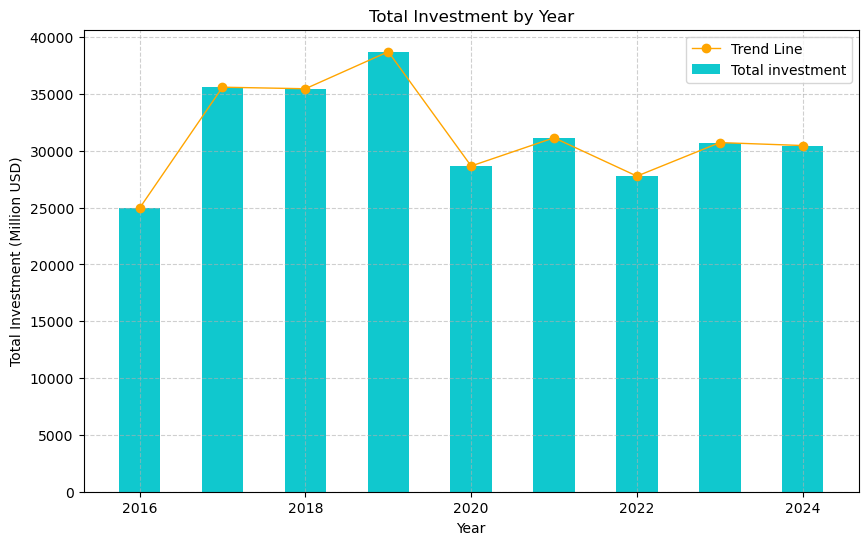

In [34]:
# Create X Matrix n × (d + 1)
X1 = np.array([[1, year] for year in total_investment_by_year['Year']])
# Vector Yan
y_value = total_investment_by_year['Total investment'].values
# Caculate X^T*X matrix
XtX = np.dot(X1.T, X1)
# Caculate (X^T*X)^(-1) matrix
XtX_inv = np.linalg.inv(XtX)
# β = (X'X)^(-1) * X'y
beta = np.dot(np.dot(XtX_inv, X1.T), y_value)
print("beta:", beta)
# Predict the total investment for the next 2 years
# Create new data for the next 2 years
new_data = np.array([[1, 2023], [1, 2024]])
# Caculate the predicted values
predicted_values = np.dot(new_data, beta)
# Create a DataFrame for the forecast
forecast_o = pd.DataFrame({'Year': [2023, 2024], 'Total investment': predicted_values})
# Combine the original data with the forecast data
combined_data = pd.concat([total_investment_by_year, forecast_o], ignore_index=True)
# Print the forecast values
for year, prediction in zip([2023, 2024], predicted_values):
    print(f'Total investment forecast for {year}: {prediction:.2f} million USD')
# Plot
plt.figure(figsize=(10, 6))
plt.bar(combined_data['Year'], combined_data['Total investment'], color='#10c8ce', width=0.5, label='Total investment')
plt.plot(combined_data['Year'], combined_data['Total investment'], color='orange', marker='o', linewidth=1, label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Total Investment (Million USD)')
plt.title('Total Investment by Year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**NOTE**
- According to <a href="https://vioit.org.vn/vn/chien-luoc-chinh-sach/tinh-hinh-dau-tu-truc-tiep-nuoc-ngoai-tai-viet-nam-nam-2023-va-ky-vong-nam-2024-5788.4050.html" target="_blank">VIOIT</a>, the actual Total investment figure for 2023 is $36.607,566 billion. 
- The FDI in Vietnam for the first 6 months of 2024 is $15.2 billion, as reported by <a href="https://www.mpi.gov.vn/portal/Pages/2024-6-28/Tinh-hinh-thu-hut-dau-tu-nuoc-ngoai-6-thang-dau-nahjazws.aspx" target="_blank">MINISTRY OF PLANNING AND INVESTMENT </a>.
- There is a significant discrepancy of up to $6 billion in the forecast, and as 2024 has not yet concluded, no final conclusions can be drawn. The accuracy of the values and labels depends heavily on the number of samples; with fewer data points from different years, the precision may be compromised.